# 22A-data-exploration-seasonality-partII
> Continue the exploratory data analysis on seasonality, which solves issues 30.

The purpose of this notebook series is to perform the continued desired exploration of the data on seasons, quaters, and holidays based on the newly subsetted iPhone data.

The notebook contains EDA on seasons, quarter, and holidays based on the subset of iPhone data. The subset data contains iPhone X, iPhone SE, and iPhone 11-14. It be noted that the iPhone SE model had two generational group releases that occurred at the following:

* apple iphone se 2020 – iphone x 
* apple iphone se 2022 – iphone 13


General Findings:

Overall, the total number of season occurrences is not vastly different from the original dataset. The only difference is that Autumn and Summer 2021 data is proportionally less than the original dataset, which is reasonable as we are focusing on newer iPhone model data. Thus, we can still conclude that we have significantly more Autumn and Summer data compare to Spring & Winter. Spring is the least amount of season occurrence data that we have in our subset.
There is overall no significant difference in the number of quarter and holiday occurances from the original dataset.

* iPhone 11 and iPhone 12 are the models with the highest number of total claims, and we can see that generally the highest total number of claims occur at autumn and summer for each phone model.

* The notebook contains the boxplots for each iPhone model based on its individual rows of claims data and on the aggregated claims data. For this notebook, it is more meaningful to look at the aggregated claims data boxplots.

> Aggregated claims data is having all claims data for each phone model aggregated based on date, so we do not differentiate on the phone model’s color. For example, we could have 10 rows of data for iphone 11 group for 2022-01-24. We would aggregate all of those claims data to make a new single row of an iphone 11 group for 2022-01-24 to use in our boxplots.

> Note about boxplot outliers: outliers on the boxplot are defined as being outside of the 1.5*IQR range. This does not necessarily mean that the 1.5*IQR range will match up to the z-score of being outside the +/-3 standard deviations. Thus when showing the full list of outliers for each of the boxplots for the aggregated claims data, the z-score value may have fluctuated to be consistent with that particular boxplot’s 1.5*IQR.


Season Findings - Summary of the Aggregated iPhone Claims Data:
* iPhone SE: There are six outliers in autumn, one outlier in summer, and two outliers in winter. Autumn and summer have very similar means, but summer has the highest mean. Excluding outliers, winter has the lowest tail-end while autumn has the highest tail-end.
* iPhone X: There are no outliers for iPhone X for any season. Autumn has the highest mean, and the winter had the lowest tail-end while summer had the highest tail-end.
* iPhone 11: There are 2 outliers, which occur at spring and winter. Autumn has the highest mean, and summer had the longest tail-ends when excluding outliers.
* iPhone 12 There are 2 outliers, which occur in spring. The highest mean is in Spring. Autumn has the highest tail-end while summer has the lowest tail-end.
* iPhone 13: The graphics look a bit odd with autumn and winter because apparently the minimum claim data points of 2 and 7 claims are not outliers. The only outlier occurs at summer. Winter has the highest tail-end while autumn has the highest mean.
* iPhone 14: It is the only graphic where the non-aggregated claims data does look like it can make sense due to the low amount of data we have for this phone model relative to the other iPhone models. Originally, we have 68 rows of data for 7 colors. If we aggregate the claims data, we will get only 14 rows of data. We only have data for autumn and winter, and we have one outlier occurring for each season. We see that winter has the largest mean. When excluding outliers, winter has the highest-tail-end and autumn has the lowest tail end.

We will need to discuss with the team to figure out what is the next step with this EDA information for when we start modeling.

Quarter Findings - Summary of the Aggregated iPhone Claims Data:
* iPhone SE: There are four outliers in Q1 and one outlier in Q2. Q3 has the highest mean. Excluding outliers, Q4 has the longest tail-ends.
* iPhone X: No outliers. Q3 has the highest mean and longest tail-end. Q1 has the shortest tail-end.
* iPhone 11: There are two outliers, which are in Q1 and Q2. The highest mean occurs in Q3, but Q4’s mean is very close. Excluding outliers, the shortest tail-end is in Q1, and the longest tail-end is in Q3.
* iPhone 12: There is one outlier in Q2. The highest mean is in Q4. Excluding outliers, the shortest tail-end is Q1 and the longest tail-end is Q4.
* iPhone 13: Similarly as in iPhone 13’s seasons, the graphic looks a bit odd as the claims data of 7 and 2 are not seen as outliers for Q1 and Q4 respectively. Q3 has three outliers. The highest mean is in Q4, and Q1 has the longest tail-end, when excluding outliers.
* iPhone 14: Similarly as in iPhone 14’s seasons, the non-aggregated graphic does look fine due to the lack of data relative to the other iPhone models. iPhone 14 only has data of Q4 and Q1. For the aggregated data, there are two outliers in Q1. Q1 has the highest mean. Excluding outliers, Q1 has the longest tail-end while Q4 has the shortest tail-end.

Holiday Findings - Summary of the Aggregated iPhone Claims Data:
* iPhone SE: There are multiple outliers on holidays being false. The mean of both boxplots are similar. Excluding outliers, the holidays as true had the longest tail-ends.  
* iPhone X: There is an outlier on holidays being true. The means of both boxplots are very similar, but holidays being false have the longer tails when excluding outliers.
* iPhone 11: There is an outlier on holidays being false. The mean on holidays being true is higher. When excluding outliers, holidays being true has the longer tail-end while holidays being false has the shorter tail-end.
* iPhone 12: No outliers. Holidays being false as the larger mean and the shorter tail-end. Holidays being true has the longer tail-end.
* iPhone 13: Similar to previous iPhone 13 graphics, this graphic looks a bit odd as the claims data of 2 and 7 are not seen as outliers for holidays as false or true respectively. There are no outliers in the graphic. The mean is higher when holidays are true, but holidays as false has the longer tail-end.
* iPhone 14: There is an outlier on when holiday is false.  The mean is very similar, but we only have 4 data points of when holidays are true for iPhone 14. Excluding outliers, the longest tail-end is similar for both graphics, but holidays as false has the shorter tail-end.

#### Helpful packages and preliminaries

In [1]:
#Data processing and evaluation
import pandas as pd
import numpy as np

#Graphical display
import matplotlib.pyplot as plt
import seaborn as sns

#Graphing magics
%matplotlib inline

from datetime import date, datetime, timedelta
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

import os

from scipy import stats

In [2]:
#Constants/globals
os.chdir('/data/p_dsi/teams2023/team9/')
os.getcwd()

'/gpfs52/data/p_dsi/teams2023/team9'

## Assessment of Data

In [3]:
#load and view data
data = pd.read_csv("Asurion_clean_data_feature_set.csv")
data.head(10)

,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group
0,apple iphone 11,128gb,black,252,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
1,apple iphone 11,128gb,green,45,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
2,apple iphone 11,128gb,purple,92,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
3,apple iphone 11,128gb,red,69,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
4,apple iphone 11,128gb,white,91,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
5,apple iphone 11,128gb,yellow,5,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
6,apple iphone 11,256gb,black,24,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
7,apple iphone 11,256gb,green,3,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
8,apple iphone 11,256gb,purple,7,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
9,apple iphone 11,256gb,red,9,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11


In [4]:
apple = data.copy()

display(apple.head(5))
display(apple.tail(5))

# Issue is that the weeks_monday is repeated, which in certain cases we might not want it to be repeated
# Other issue is that we didn't take into account the SE models

,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group
0,apple iphone 11,128gb,black,252,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
1,apple iphone 11,128gb,green,45,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
2,apple iphone 11,128gb,purple,92,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
3,apple iphone 11,128gb,red,69,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11
4,apple iphone 11,128gb,white,91,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group
11679,apple iphone xs max,256gb,silver,4,2023-02-13,February,2023,winter,Q1,False,apple,iphone x
11680,apple iphone xs max,512gb,gray,2,2023-02-13,February,2023,winter,Q1,False,apple,iphone x
11681,apple iphone xs max,64gb,gold,12,2023-02-13,February,2023,winter,Q1,False,apple,iphone x
11682,apple iphone xs max,64gb,gray,8,2023-02-13,February,2023,winter,Q1,False,apple,iphone x
11683,apple iphone xs max,64gb,silver,1,2023-02-13,February,2023,winter,Q1,False,apple,iphone x


In [5]:
# Checking on what are the final groups found in the data
group_model = apple.groupby('model_group')
group_model.first()

,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company
model_group,,,,,,,,,,,
iphone 11,apple iphone 11,128gb,black,252,2022-01-24,January,2022,winter,Q1,False,apple
iphone 12,apple iphone 12,128gb,black,68,2022-01-24,January,2022,winter,Q1,False,apple
iphone 13,apple iphone 13,128gb,midnight,11,2022-01-24,January,2022,winter,Q1,False,apple
iphone 14,apple iphone 14,128gb,black,7,2022-11-14,November,2022,autumn,Q4,False,apple
iphone se,apple iphone se,128gb,gray,1,2022-01-24,January,2022,winter,Q1,False,apple
iphone x,apple iphone x,256gb,gray,62,2022-01-24,January,2022,winter,Q1,False,apple


# EDA Section

Count
season year       
autumn 2021   1335
       2022   2179
spring 2022   2054
summer 2021   1248
       2022   2244
winter 2021    110
       2022   1359
       2023   1155

Total number of rows in the table above is 11684


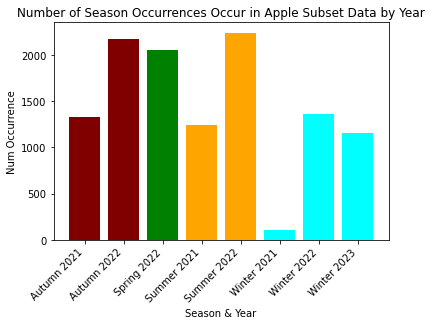

In [6]:
season_year = apple.groupby(['season', 'year'])

season_count = season_year.agg(Count =('season', 'count'))

display(season_count)
# Confirmed that this matches to the sum of all data entries of the subset
print("Total number of rows in the table above is", sum(season_count["Count"]))

# Using mathplotlib graphing on a Pandas dataframe
bars = ('Autumn 2021', 'Autumn 2022', 'Spring 2022', 'Summer 2021', 'Summer 2022', 'Winter 2021', 'Winter 2022', 'Winter 2023')
x_pos = np.arange(len(season_count["Count"]))
plt.bar(x_pos, season_count["Count"], color=['maroon', 'maroon', 'green', 'orange', 'orange', 'cyan', 'cyan', 'cyan'])
plt.xticks(x_pos, bars, rotation = 45, ha = 'right')

plt.xlabel("Season & Year")
plt.ylabel("Num Occurrence") 
  
# displaying the title
plt.title("Number of Season Occurrences Occur in Apple Subset Data by Year")

plt.show()

Sum
quarter year        
Q1      2022   84619
        2023   68380
Q2      2021    3273
        2022  101097
Q3      2021   99482
        2022  138178
Q4      2021   99962
        2022  145135

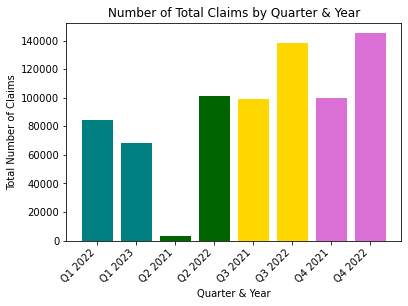

In [7]:
quarter_year = apple.groupby(['quarter', 'year'])

quarter_year_claim = quarter_year.agg(Sum =('claim', np.sum))
# Showing the exact claim numbers by quarter by year
display(quarter_year_claim)

# Using mathplotlib graphing on a Pandas dataframe
bars = ('Q1 2022', 'Q1 2023', 'Q2 2021', 'Q2 2022', 'Q3 2021', 'Q3 2022', 'Q4 2021', 'Q4 2022')
x_pos = np.arange(len(quarter_year_claim["Sum"]))
plt.bar(x_pos, quarter_year_claim["Sum"], color=['teal', 'teal', 'darkgreen', 'darkgreen', 'gold', 'gold', 'orchid', 'orchid'])
plt.xticks(x_pos, bars, rotation = 45, ha = 'right')

plt.xlabel("Quarter & Year")
plt.ylabel("Total Number of Claims") 
  
# displaying the title
plt.title("Number of Total Claims by Quarter & Year")

plt.show()

# Note data started on 6/28/2021, which was the end of Q2 2021 and we are still ongoing in Q1 2023

,Sum
Holidays_Boolean,
False,581036
True,159090


The percentage of claims that happen when it is not a holiday is 78.51 %
The percentage of claims that happen when it is a holiday is 21.49 %


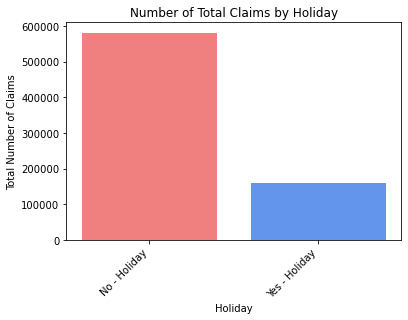

In [9]:
holidays = apple.groupby(['Holidays_Boolean'])

holidays_claim = holidays.agg(Sum =('claim', np.sum))

# Showing the exact claim numbers by holiday
display(holidays_claim)
print("The percentage of claims that happen when it is not a holiday is", round(581036/740126*100,2) , "%")
print("The percentage of claims that happen when it is a holiday is", round(159090/740126*100,2) , "%")

# Using mathplotlib graphing on a Pandas dataframe
bars = ('No - Holiday', 'Yes - Holiday')
x_pos = np.arange(len(holidays_claim["Sum"]))
plt.bar(x_pos, holidays_claim["Sum"], color=['lightcoral', 'cornflowerblue'])
plt.xticks(x_pos, bars, rotation = 45, ha = 'right')

plt.xlabel("Holiday")
plt.ylabel("Total Number of Claims") 
  
# displaying the title
plt.title("Number of Total Claims by Holiday")

plt.show()

# Based on the percentage of holidays available in the dataset, there doesn't seem to be much of a significant difference

## EDA on Model and Season Section

### EDA on Season Row Count by Model

Count
model_group season       
iphone 11   autumn    907
            spring    496
            summer    943
            winter    681
iphone 12   autumn    944
            spring    651
            summer    876
            winter    748
iphone 13   autumn    496
            spring    334
            summer    506
            winter    325
iphone 14   autumn     22
            winter     46
iphone se   autumn    312
            spring    144
            summer    315
            winter    192
iphone x    autumn    833
            spring    429
            summer    852
            winter    632

Total number of rows in the apple season table above is 11684


Count
model_group season       
iphone 12   autumn    944
iphone 11   summer    943
            autumn    907
iphone 12   summer    876
iphone x    summer    852
            autumn    833
iphone 12   winter    748
iphone 11   winter    681
iphone 12   spring    651
iphone x    winter    632
iphone 13   summer    506
iphone 11   spring    496
iphone 13   autumn    496
iphone x    spring    429
iphone 13   spring    334
            winter    325
iphone se   summer    315
            autumn    312
            winter    192
            spring    144
iphone 14   winter     46
            autumn     22

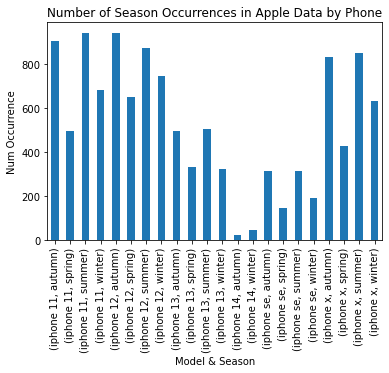

In [10]:
apple_season = apple.groupby(['model_group', 'season'])

apple_season_count = apple_season.agg(Count =('season', 'count'))

display(apple_season_count)
print("Total number of rows in the apple season table above is", sum(apple_season_count["Count"]))

apple_graphic1 = apple_season_count.plot(y="Count", kind="bar", title = "Number of Season Occurrences in Apple Data by Phone", rot=90)
apple_graphic1.set(xlabel="Model & Season", ylabel="Num Occurrence")
# Remove the legend that is auto-generated
apple_graphic1.legend('', frameon=False)

apple_season_count.groupby(['model_group', 'season']).max().sort_values(by = 'Count', ascending = False)

# The table shows the number of entries we have per season based on iphone model

### EDA on Total Claims by Model and Season

                    Sum_Claim
model_group season           
iphone 11   autumn      74916
            spring      33015
            summer      77572
            winter      43329
iphone 12   autumn      80825
            spring      41126
            summer      64860
            winter      55505
iphone 13   autumn      41821
            spring      14197
            summer      33949
            winter      27741
iphone 14   autumn        173
            winter        634
iphone se   autumn       6245
            spring       3355
            summer       6719
            winter       3953
iphone x    autumn      41687
            spring      15155
            summer      48729
            winter      24620


Sum_Claim
model_group season           
iphone 12   autumn      80825
iphone 11   summer      77572
            autumn      74916
iphone 12   summer      64860
            winter      55505
iphone x    summer      48729
iphone 11   winter      43329
iphone 13   autumn      41821
iphone x    autumn      41687
iphone 12   spring      41126
iphone 13   summer      33949
iphone 11   spring      33015
iphone 13   winter      27741
iphone x    winter      24620
            spring      15155
iphone 13   spring      14197
iphone se   summer       6719
            autumn       6245
            winter       3953
            spring       3355
iphone 14   winter        634
            autumn        173

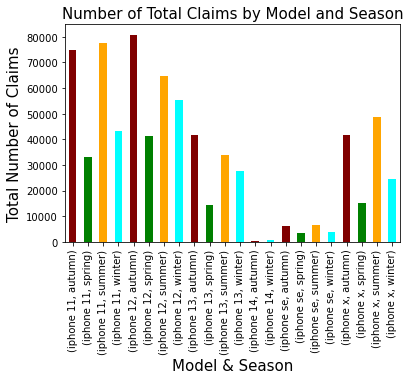

In [11]:
total_claims_season_model = apple.groupby(['model_group', 'season'])

total_claims_season_model_count = total_claims_season_model.agg(Sum_Claim =('claim', np.sum))

print(total_claims_season_model_count)

# Showing the exact claim numbers by season
total_claims_season_model_count.plot.bar(y="Sum_Claim", color = ['maroon', 'green', 'orange', 'cyan', 'maroon', 'green', 'orange', 'cyan','maroon', 'green', 'orange', 'cyan','maroon', 'cyan', 'maroon', 'green', 'orange', 'cyan'], rot=90)
plt.xlabel("Model & Season",  size = 15)
plt.ylabel("Total Number of Claims", size = 15)
plt.title("Number of Total Claims by Model and Season", size = 15)
# Remove the legend that is auto-generated
plt.legend('', frameon=False)

total_claims_season_model_count.groupby(['model_group', 'season']).max().sort_values(by = 'Sum_Claim', ascending = False)

# Total number of claims for each model_group by season

### Table on Claims Data by Individual Row - Season

In [12]:
# Mean, min, max of each model and season for their claims - each claim data point is not aggreagated
result = apple.groupby(['model_group', 'season']).agg({'claim': ['mean', 'min', 'max']})
print(result)

                        claim         
                         mean min  max
model_group season                    
iphone 11   autumn  82.597574   1  450
            spring  66.562500   1  370
            summer  82.260870   1  417
            winter  63.625551   1  352
iphone 12   autumn  85.619703   1  566
            spring  63.173579   1  405
            summer  74.041096   1  524
            winter  74.204545   1  470
iphone 13   autumn  84.316532   1  385
            spring  42.505988   1  250
            summer  67.092885   1  335
            winter  85.356923   1  432
iphone 14   autumn   7.863636   2   25
            winter  13.782609   1   71
iphone se   autumn  20.016026   1  189
            spring  23.298611   1  132
            summer  21.330159   1  178
            winter  20.588542   1  148
iphone x    autumn  50.044418   1  353
            spring  35.326340   1  209
            summer  57.193662   1  350
            winter  38.955696   1  324


### EDA on iPhone SE - Season

Text(0.5, 1.0, 'Apple iPhone SE Claims by Season')

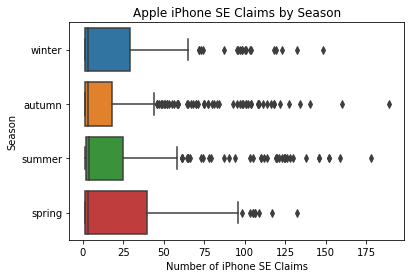

In [18]:
# Boxplot from seaborn
sns.boxplot(data=apple[apple["model_group"] == "iphone se"], x="claim", y="season")

plt.xlabel("Number of iPhone SE Claims") 
plt.ylabel("Season")  

plt.title("Apple iPhone SE Claims by Season")

# This is a boxplot on all individual iPhone SE claims data - the data is not yet aggregated

In [22]:
# Outliers for iPhone SE Winter
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone se") & (apple["season"] == "winter")] ['claim'])
outliers = data[(data['z_score'] > 2.2) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iPhone SE Autumn
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone se") & (apple["season"] == "autumn")] ['claim'])
outliers = data[(data['z_score'] > 2.2) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iPhone SE Summer
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone se") & (apple["season"] == "summer")] ['claim'])
outliers = data[(data['z_score'] > 2.2) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iPhone SE Spring
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone se") & (apple["season"] == "spring")] ['claim'])
outliers = data[(data['z_score'] > 2.2) | (data['z_score'] < -3)]
display(outliers)

,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
69,apple iphone se 2020,64gb,black,104,2022-01-24,January,2022,winter,Q1,False,apple,iphone se,2.624148
3755,apple iphone se 2020,64gb,black,123,2023-01-09,January,2023,winter,Q1,False,apple,iphone se,3.221893
3922,apple iphone se 2020,64gb,black,148,2023-01-16,January,2023,winter,Q1,True,apple,iphone se,4.008401
6616,apple iphone se 2020,64gb,black,97,2021-12-27,December,2021,winter,Q4,True,apple,iphone se,2.403926
6617,apple iphone se 2020,64gb,red,95,2021-12-27,December,2021,winter,Q4,True,apple,iphone se,2.341006
6724,apple iphone se 2020,64gb,black,100,2022-01-03,January,2022,winter,Q1,False,apple,iphone se,2.498307
6831,apple iphone se 2020,64gb,black,98,2022-01-10,January,2022,winter,Q1,False,apple,iphone se,2.435386
6939,apple iphone se 2020,64gb,black,96,2022-01-17,January,2022,winter,Q1,True,apple,iphone se,2.372466
7158,apple iphone se 2020,64gb,black,119,2022-02-07,February,2022,winter,Q1,False,apple,iphone se,3.096052
7267,apple iphone se 2020,64gb,black,98,2022-02-14,February,2022,winter,Q1,False,apple,iphone se,2.435386


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
2275,apple iphone se 2020,64gb,black,118,2022-09-26,September,2022,autumn,Q3,False,apple,iphone se,2.860645
2447,apple iphone se 2020,64gb,black,160,2022-10-10,October,2022,autumn,Q4,True,apple,iphone se,4.086836
2623,apple iphone se 2020,64gb,black,134,2022-10-17,October,2022,autumn,Q4,False,apple,iphone se,3.327765
2802,apple iphone se 2020,64gb,black,140,2022-10-31,October,2022,autumn,Q4,False,apple,iphone se,3.502936
2969,apple iphone se 2020,64gb,black,189,2022-11-07,November,2022,autumn,Q4,True,apple,iphone se,4.933492
2970,apple iphone se 2020,64gb,red,101,2022-11-07,November,2022,autumn,Q4,True,apple,iphone se,2.364330
5269,apple iphone se 2020,64gb,black,98,2021-09-27,September,2021,autumn,Q3,False,apple,iphone se,2.276744
5358,apple iphone se 2020,64gb,black,104,2021-10-04,October,2021,autumn,Q4,False,apple,iphone se,2.451915
5458,apple iphone se 2020,64gb,black,99,2021-10-11,October,2021,autumn,Q4,True,apple,iphone se,2.305939
5553,apple iphone se 2020,64gb,black,108,2021-10-18,October,2021,autumn,Q4,False,apple,iphone se,2.568695


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
891,apple iphone se 2020,64gb,black,152,2022-07-04,July,2022,summer,Q3,True,apple,iphone se,3.570679
1061,apple iphone se 2020,64gb,black,146,2022-07-25,July,2022,summer,Q3,False,apple,iphone se,3.406723
1233,apple iphone se 2020,64gb,black,125,2022-08-01,August,2022,summer,Q3,False,apple,iphone se,2.832878
1405,apple iphone se 2020,64gb,black,178,2022-08-08,August,2022,summer,Q3,False,apple,iphone se,4.281153
1581,apple iphone se 2020,64gb,black,121,2022-08-15,August,2022,summer,Q3,False,apple,iphone se,2.723574
1757,apple iphone se 2020,64gb,black,110,2022-08-29,August,2022,summer,Q3,False,apple,iphone se,2.422988
1929,apple iphone se 2020,64gb,black,130,2022-09-05,September,2022,summer,Q3,True,apple,iphone se,2.969508
2104,apple iphone se 2020,64gb,black,128,2022-09-19,September,2022,summer,Q3,False,apple,iphone se,2.914856
4109,apple iphone se 2020,64gb,black,119,2021-07-05,July,2021,summer,Q3,True,apple,iphone se,2.668922
4287,apple iphone se 2020,64gb,black,103,2021-07-19,July,2021,summer,Q3,False,apple,iphone se,2.231707


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
7850,apple iphone se 2020,64gb,black,98,2022-03-21,March,2022,spring,Q1,False,apple,iphone se,2.247695
8099,apple iphone se 2020,64gb,black,109,2022-04-04,April,2022,spring,Q2,False,apple,iphone se,2.578675
8371,apple iphone se 2020,64gb,black,105,2022-04-18,April,2022,spring,Q2,False,apple,iphone se,2.458319
8516,apple iphone se 2020,64gb,black,106,2022-04-25,April,2022,spring,Q2,False,apple,iphone se,2.488408
8801,apple iphone se 2020,64gb,black,105,2022-05-09,May,2022,spring,Q2,False,apple,iphone se,2.458319
9113,apple iphone se 2020,64gb,black,117,2022-05-23,May,2022,spring,Q2,False,apple,iphone se,2.819387
9441,apple iphone se 2020,64gb,black,103,2022-06-06,June,2022,spring,Q2,False,apple,iphone se,2.398140
9611,apple iphone se 2020,64gb,black,106,2022-06-13,June,2022,spring,Q2,False,apple,iphone se,2.488408
9781,apple iphone se 2020,64gb,black,132,2022-06-20,June,2022,spring,Q2,False,apple,iphone se,3.270723


#### EDA on iPhone SE by Aggregating Claims Data for Each Weeks_Monday Sub-Section - Season

In [23]:
iphone_se = apple[apple["model_group"] == "iphone se"]

result_iphone_se = iphone_se.groupby(['season', 'weeks_monday'], as_index = False).agg({'claim': np.sum})

print(result_iphone_se)

    season weeks_monday  claim
0   autumn   2021-09-27    233
1   autumn   2021-10-04    237
2   autumn   2021-10-11    218
3   autumn   2021-10-18    234
4   autumn   2021-10-25    241
..     ...          ...    ...
81  winter   2023-01-16    315
82  winter   2023-01-23    282
83  winter   2023-01-30    117
84  winter   2023-02-06     34
85  winter   2023-02-13      8

[86 rows x 3 columns]


Text(0.5, 1.0, 'Apple iPhone SE Claims by Season')

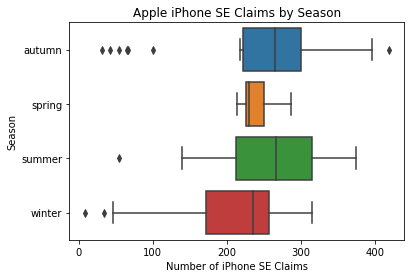

In [24]:
# Boxplot from seaborn
sns.boxplot(data=result_iphone_se, x="claim", y="season")

plt.xlabel("Number of iPhone SE Claims") 
plt.ylabel("Season")

plt.title("Apple iPhone SE Claims by Season")

# This is a more proper graphic - representing all iPhone SE Claims data through weeks_monday aggregation


In [32]:
result_iphone_se_autumn = result_iphone_se.copy()

autumn_iphonese = result_iphone_se_autumn[result_iphone_se_autumn["season"] == "autumn"]

display(autumn_iphonese)

autumn_iphonese['z_score'] = stats.zscore(autumn_iphonese['claim'])
outliers_autumn_iphonese = autumn_iphonese[(autumn_iphonese['z_score'] > 1.5) | (autumn_iphonese['z_score'] < -1.5)]
display(outliers_autumn_iphonese)


result_iphone_se_summer = result_iphone_se.copy()

summer_iphonese = result_iphone_se_summer[result_iphone_se_summer["season"] == "summer"]

display(summer_iphonese)

summer_iphonese['z_score'] = stats.zscore(summer_iphonese['claim'])
outliers_summer_iphonese = summer_iphonese[(summer_iphonese['z_score'] > 3) | (summer_iphonese['z_score'] < -2.5)]
display(outliers_summer_iphonese)



result_iphone_se_winter = result_iphone_se.copy()

winter_iphonese = result_iphone_se_winter[result_iphone_se_winter["season"] == "winter"]

display(winter_iphonese)

winter_iphonese['z_score'] = stats.zscore(winter_iphonese['claim'])
outliers_winter_iphonese = winter_iphonese[(winter_iphonese['z_score'] > 3) | (winter_iphonese['z_score'] < -1.8)]
display(outliers_winter_iphonese)


# Note: Outliers for boxplots are when they are outside of the 1.5 * IQR range, this doesn't necessarily match up to the z-score
# definition, so the z-score value cut-offs have been slightly adjusted so we can identify the data point that fell out of range
# for the boxplots

,season,weeks_monday,claim
0,autumn,2021-09-27,233
1,autumn,2021-10-04,237
2,autumn,2021-10-11,218
3,autumn,2021-10-18,234
4,autumn,2021-10-25,241
5,autumn,2021-11-01,289
6,autumn,2021-11-08,284
7,autumn,2021-11-15,248
8,autumn,2021-11-22,251
9,autumn,2021-11-29,291


/tmp/ipykernel_20853/1652080909.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autumn_iphonese['z_score'] = stats.zscore(autumn_iphonese['claim'])


,season,weeks_monday,claim,z_score
19,autumn,2022-11-07,419,1.615607
21,autumn,2022-11-21,67,-1.564870
22,autumn,2022-11-28,65,-1.582941
23,autumn,2022-12-05,55,-1.673295
24,autumn,2022-12-12,31,-1.890146
25,autumn,2022-12-19,42,-1.790756


,season,weeks_monday,claim
40,summer,2021-06-28,55
41,summer,2021-07-05,171
42,summer,2021-07-12,140
43,summer,2021-07-19,199
44,summer,2021-07-26,222
45,summer,2021-08-02,234
46,summer,2021-08-09,222
47,summer,2021-08-16,254
48,summer,2021-08-23,280
49,summer,2021-08-30,210


/tmp/ipykernel_20853/1652080909.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_iphonese['z_score'] = stats.zscore(summer_iphonese['claim'])


,season,weeks_monday,claim,z_score
40,summer,2021-06-28,55,-2.673272


,season,weeks_monday,claim
66,winter,2021-12-27,268
67,winter,2022-01-03,263
68,winter,2022-01-10,220
69,winter,2022-01-17,240
70,winter,2022-01-24,235
71,winter,2022-01-31,191
72,winter,2022-02-07,256
73,winter,2022-02-14,221
74,winter,2022-02-21,207
75,winter,2022-02-28,236


/tmp/ipykernel_20853/1652080909.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_iphonese['z_score'] = stats.zscore(winter_iphonese['claim'])


,season,weeks_monday,claim,z_score
84,winter,2023-02-06,34,-1.811644
85,winter,2023-02-13,8,-2.099470


In [33]:
iphonese_stats = result_iphone_se.groupby(['season']).agg({'claim': ['mean', 'min', 'max']})
print(iphonese_stats)

             claim          
              mean  min  max
season                      
autumn  240.192308   31  419
spring  239.642857  214  287
summer  258.423077   55  375
winter  197.650000    8  315


### EDA on iPhone X - Season

Text(0.5, 1.0, 'Apple iPhone X Claims by Season')

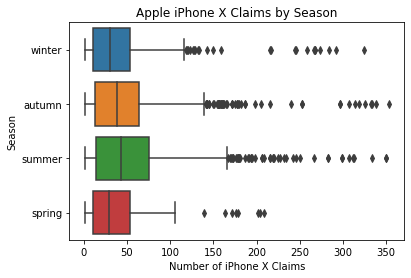

In [13]:
# Boxplot from seaborn
sns.boxplot(data=apple[apple["model_group"] == "iphone x"], x="claim", y="season")

plt.xlabel("Number of iPhone X Claims") 
plt.ylabel("Season")  

plt.title("Apple iPhone X Claims by Season")

# This is a boxplot on all individual iPhone X claims data - the data is not yet aggregated

In [14]:
# Outliers for iPhone X Winter
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone x") & (apple["season"] == "winter")] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iPhone X Autumn
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone x") & (apple["season"] == "autumn")] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iPhone X Summer
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone x") & (apple["season"] == "summer")] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iPhone X Spring
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone x") & (apple["season"] == "spring")] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
86,apple iphone xr,64gb,black,273,2022-01-24,January,2022,winter,Q1,False,apple,iphone x,5.458644
6637,apple iphone xr,64gb,black,324,2021-12-27,December,2021,winter,Q4,True,apple,iphone x,6.648124
6746,apple iphone xr,64gb,black,292,2022-01-03,January,2022,winter,Q1,False,apple,iphone x,5.901784
6849,apple iphone xr,64gb,black,246,2022-01-10,January,2022,winter,Q1,False,apple,iphone x,4.828920
6955,apple iphone xr,64gb,black,267,2022-01-17,January,2022,winter,Q1,True,apple,iphone x,5.318706
7066,apple iphone xr,64gb,black,216,2022-01-31,January,2022,winter,Q1,False,apple,iphone x,4.129226
7174,apple iphone xr,64gb,black,268,2022-02-07,February,2022,winter,Q1,False,apple,iphone x,5.342029
7284,apple iphone xr,64gb,black,217,2022-02-14,February,2022,winter,Q1,False,apple,iphone x,4.152549
7389,apple iphone xr,64gb,black,258,2022-02-21,February,2022,winter,Q1,True,apple,iphone x,5.108798
7500,apple iphone xr,64gb,black,244,2022-02-28,February,2022,winter,Q1,False,apple,iphone x,4.782274


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
2476,apple iphone xr,64gb,black,215,2022-10-10,October,2022,autumn,Q4,True,apple,iphone x,3.136066
5282,apple iphone xr,64gb,black,318,2021-09-27,September,2021,autumn,Q3,False,apple,iphone x,5.094259
5376,apple iphone xr,64gb,black,240,2021-10-04,October,2021,autumn,Q4,False,apple,iphone x,3.611356
5474,apple iphone xr,64gb,black,338,2021-10-11,October,2021,autumn,Q4,True,apple,iphone x,5.474490
5569,apple iphone xr,64gb,black,307,2021-10-18,October,2021,autumn,Q4,False,apple,iphone x,4.885131
5666,apple iphone xr,64gb,black,333,2021-10-25,October,2021,autumn,Q4,False,apple,iphone x,5.379432
5770,apple iphone xr,64gb,black,332,2021-11-01,November,2021,autumn,Q4,False,apple,iphone x,5.360421
5870,apple iphone xr,64gb,black,353,2021-11-08,November,2021,autumn,Q4,True,apple,iphone x,5.759664
5976,apple iphone xr,64gb,black,314,2021-11-15,November,2021,autumn,Q4,False,apple,iphone x,5.018212
6082,apple iphone xr,64gb,black,252,2021-11-22,November,2021,autumn,Q4,True,apple,iphone x,3.839494


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
4127,apple iphone xr,64gb,black,350,2021-07-05,July,2021,summer,Q3,True,apple,iphone x,5.071973
4137,apple iphone xs,64gb,gray,266,2021-07-05,July,2021,summer,Q3,True,apple,iphone x,3.616930
4216,apple iphone xr,64gb,black,299,2021-07-12,July,2021,summer,Q3,False,apple,iphone x,4.188554
4304,apple iphone xr,64gb,black,313,2021-07-19,July,2021,summer,Q3,False,apple,iphone x,4.431062
4314,apple iphone xs,64gb,gray,232,2021-07-19,July,2021,summer,Q3,False,apple,iphone x,3.027985
4395,apple iphone xr,64gb,black,282,2021-07-26,July,2021,summer,Q3,False,apple,iphone x,3.894082
4492,apple iphone xr,64gb,black,307,2021-08-02,August,2021,summer,Q3,False,apple,iphone x,4.327130
4592,apple iphone xr,64gb,black,299,2021-08-09,August,2021,summer,Q3,False,apple,iphone x,4.188554
4602,apple iphone xs,64gb,gray,242,2021-08-09,August,2021,summer,Q3,False,apple,iphone x,3.201204
4693,apple iphone xr,64gb,black,350,2021-08-16,August,2021,summer,Q3,False,apple,iphone x,5.071973


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
7988,apple iphone xr,64gb,black,163,2022-03-28,March,2022,spring,Q1,False,apple,iphone x,4.049875
8115,apple iphone xr,64gb,black,202,2022-04-04,April,2022,spring,Q2,False,apple,iphone x,5.286975
8241,apple iphone xr,64gb,black,171,2022-04-11,April,2022,spring,Q2,False,apple,iphone x,4.303639
9132,apple iphone xr,64gb,black,176,2022-05-23,May,2022,spring,Q2,False,apple,iphone x,4.462241
9296,apple iphone xr,64gb,black,139,2022-05-30,May,2022,spring,Q2,True,apple,iphone x,3.288582
9466,apple iphone xr,64gb,black,178,2022-06-06,June,2022,spring,Q2,False,apple,iphone x,4.525682
9636,apple iphone xr,64gb,black,209,2022-06-13,June,2022,spring,Q2,False,apple,iphone x,5.509018
9802,apple iphone xr,64gb,black,204,2022-06-20,June,2022,spring,Q2,False,apple,iphone x,5.350416


#### EDA on iPhone X by Aggregating Claims Data for Each Weeks_Monday Sub-Section - Season

In [15]:
iphone_10 = apple[apple["model_group"] == "iphone x"]

result_iphone_10 = iphone_10.groupby(['season', 'weeks_monday'], as_index = False).agg({'claim': np.sum})

print(result_iphone_10)

    season weeks_monday  claim
0   autumn   2021-09-27   2138
1   autumn   2021-10-04   2279
2   autumn   2021-10-11   2504
3   autumn   2021-10-18   2342
4   autumn   2021-10-25   2339
..     ...          ...    ...
81  winter   2023-01-16    853
82  winter   2023-01-23    815
83  winter   2023-01-30    770
84  winter   2023-02-06    964
85  winter   2023-02-13    179

[86 rows x 3 columns]


Text(0.5, 1.0, 'Apple iPhone X Claims by Season')

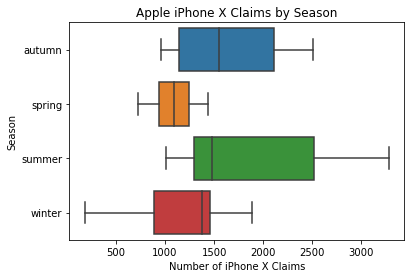

In [16]:
# Boxplot from seaborn
sns.boxplot(data=result_iphone_10, x="claim", y="season")

plt.xlabel("Number of iPhone X Claims") 
plt.ylabel("Season")

plt.title("Apple iPhone X Claims by Season")

# This is a more proper graphic - representing all iPhone X Claims data through weeks_monday aggregation

In [17]:
iphoneX_stats = result_iphone_10.groupby(['season']).agg({'claim': ['mean', 'min', 'max']})
print(iphoneX_stats)

              claim            
               mean   min   max
season                         
autumn  1603.346154   957  2504
spring  1082.500000   721  1433
summer  1874.192308  1014  3280
winter  1231.000000   179  1882


### EDA on iPhone 11 - Season

Text(0.5, 1.0, 'Apple iPhone 11 Claims by Season')

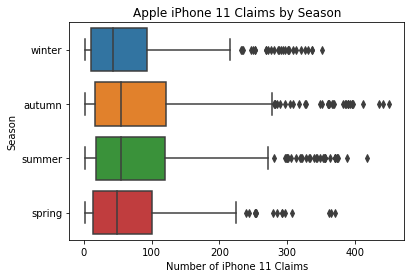

In [17]:
# Boxplot from seaborn
sns.boxplot(data=apple[apple["model_group"] == "iphone 11"], x="claim", y="season")

plt.xlabel("Number of iPhone 11 Claims") 
plt.ylabel("Season")  

plt.title("Apple iPhone 11 Claims by Season")

# This is a boxplot on all individual iPhone 11 claims data - the data is not yet aggregated

In [18]:
# Outliers for iphone 11 Winter
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 11") & (apple["season"] == "winter")] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iphone 11 Autumn
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 11") & (apple["season"] == "autumn")] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iphone 11 Summer
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 11") & (apple["season"] == "summer")] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iphone 11 Spring
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 11") & (apple["season"] == "spring")] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
11,apple iphone 11,64gb,black,291,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11,3.321781
3055,apple iphone 11,64gb,black,309,2022-12-26,December,2022,winter,Q4,True,apple,iphone 11,3.584749
3198,apple iphone 11,64gb,black,301,2023-01-02,January,2023,winter,Q1,True,apple,iphone 11,3.467874
3360,apple iphone 11,64gb,black,313,2023-01-09,January,2023,winter,Q1,False,apple,iphone 11,3.643186
3522,apple iphone 11,64gb,black,276,2023-01-16,January,2023,winter,Q1,True,apple,iphone 11,3.102642
5998,apple iphone 11,128gb,black,271,2021-12-27,December,2021,winter,Q4,True,apple,iphone 11,3.029595
6010,apple iphone 11,64gb,black,330,2021-12-27,December,2021,winter,Q4,True,apple,iphone 11,3.891544
6096,apple iphone 11,128gb,black,301,2022-01-03,January,2022,winter,Q1,False,apple,iphone 11,3.467874
6107,apple iphone 11,64gb,black,352,2022-01-03,January,2022,winter,Q1,False,apple,iphone 11,4.212949
6194,apple iphone 11,128gb,black,286,2022-01-10,January,2022,winter,Q1,False,apple,iphone 11,3.248735


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
105,apple iphone 11,64gb,black,383,2022-11-14,November,2022,autumn,Q4,False,apple,iphone 11,3.485471
419,apple iphone 11,64gb,black,351,2022-11-28,November,2022,autumn,Q4,False,apple,iphone 11,3.114185
583,apple iphone 11,64gb,black,385,2022-12-12,December,2022,autumn,Q4,False,apple,iphone 11,3.508676
2157,apple iphone 11,64gb,black,450,2022-10-10,October,2022,autumn,Q4,True,apple,iphone 11,4.262850
2308,apple iphone 11,64gb,black,389,2022-10-17,October,2022,autumn,Q4,False,apple,iphone 11,3.555087
2461,apple iphone 11,64gb,black,396,2022-10-31,October,2022,autumn,Q4,False,apple,iphone 11,3.636305
2615,apple iphone 11,64gb,black,389,2022-11-07,November,2022,autumn,Q4,True,apple,iphone 11,3.555087
2766,apple iphone 11,64gb,black,360,2022-12-05,December,2022,autumn,Q4,False,apple,iphone 11,3.218609
2917,apple iphone 11,64gb,black,442,2022-12-19,December,2022,autumn,Q4,False,apple,iphone 11,4.170028
4808,apple iphone 11,64gb,black,397,2021-09-27,September,2021,autumn,Q3,False,apple,iphone 11,3.647908


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
890,apple iphone 11,64gb,black,388,2022-07-25,July,2022,summer,Q3,False,apple,iphone 11,3.697355
1045,apple iphone 11,64gb,black,370,2022-08-01,August,2022,summer,Q3,False,apple,iphone 11,3.479678
1198,apple iphone 11,64gb,black,344,2022-08-08,August,2022,summer,Q3,False,apple,iphone 11,3.165256
1358,apple iphone 11,64gb,black,355,2022-08-15,August,2022,summer,Q3,False,apple,iphone 11,3.298281
1520,apple iphone 11,64gb,black,375,2022-08-29,August,2022,summer,Q3,False,apple,iphone 11,3.540144
3764,apple iphone 11,64gb,black,417,2021-07-05,July,2021,summer,Q3,True,apple,iphone 11,4.048057
3847,apple iphone 11,64gb,black,370,2021-07-12,July,2021,summer,Q3,False,apple,iphone 11,3.479678
3929,apple iphone 11,64gb,black,339,2021-07-19,July,2021,summer,Q3,False,apple,iphone 11,3.104790
4009,apple iphone 11,64gb,black,355,2021-07-26,July,2021,summer,Q3,False,apple,iphone 11,3.298281
4089,apple iphone 11,64gb,black,371,2021-08-02,August,2021,summer,Q3,False,apple,iphone 11,3.491772


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
7110,apple iphone 11,64gb,black,279,2022-03-21,March,2022,spring,Q1,False,apple,iphone 11,3.161019
7215,apple iphone 11,64gb,black,292,2022-03-28,March,2022,spring,Q1,False,apple,iphone 11,3.354456
7964,apple iphone 11,64gb,black,285,2022-05-09,May,2022,spring,Q2,False,apple,iphone 11,3.250297
8103,apple iphone 11,64gb,black,293,2022-05-16,May,2022,spring,Q2,False,apple,iphone 11,3.369335
8249,apple iphone 11,64gb,black,297,2022-05-23,May,2022,spring,Q2,False,apple,iphone 11,3.428854
8399,apple iphone 11,64gb,black,307,2022-05-30,May,2022,spring,Q2,True,apple,iphone 11,3.577652
8553,apple iphone 11,64gb,black,370,2022-06-06,June,2022,spring,Q2,False,apple,iphone 11,4.515077
8709,apple iphone 11,64gb,black,362,2022-06-13,June,2022,spring,Q2,False,apple,iphone 11,4.396039
8863,apple iphone 11,64gb,black,364,2022-06-20,June,2022,spring,Q2,False,apple,iphone 11,4.425798


#### EDA on iPhone 11 by Aggregating Claims Data for Each Weeks_Monday Sub-Section - Season

In [19]:
iphone_11 = apple[apple["model_group"] == "iphone 11"]

result_iphone_11 = iphone_11.groupby(['season', 'weeks_monday'], as_index = False).agg({'claim': np.sum})

print(result_iphone_11)

    season weeks_monday  claim
0   autumn   2021-09-27   3768
1   autumn   2021-10-04   3384
2   autumn   2021-10-11   3336
3   autumn   2021-10-18   3360
4   autumn   2021-10-25   3428
..     ...          ...    ...
81  winter   2023-01-16   1856
82  winter   2023-01-23   1751
83  winter   2023-01-30   1536
84  winter   2023-02-06   2157
85  winter   2023-02-13    378

[86 rows x 3 columns]


Text(0.5, 1.0, 'Apple iphone 11 Claims by Season')

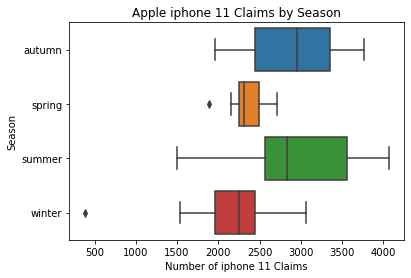

In [20]:

# Boxplot from seaborn
sns.boxplot(data=result_iphone_11, x="claim", y="season")

plt.xlabel("Number of iphone 11 Claims")
plt.ylabel("Season")

plt.title("Apple iphone 11 Claims by Season")

# This is a more proper graphic - representing all iPhone 11 Claims data through weeks_monday aggregation

In [21]:
result_iphone_11_winter = result_iphone_11.copy()

winter_iphone11 = result_iphone_11_winter[result_iphone_11_winter["season"] == "winter"]

display(winter_iphone11)

winter_iphone11['z_score'] = stats.zscore(winter_iphone11['claim'])
outliers_winter_iphone11 = winter_iphone11[(winter_iphone11['z_score'] > 3) | (winter_iphone11['z_score'] < -3)]
display(outliers_winter_iphone11)


result_iphone_11_spring = result_iphone_11.copy()

spring_iphone11 = result_iphone_11_spring[result_iphone_11_spring["season"] == "spring"]

display(spring_iphone11)

spring_iphone11['z_score'] = stats.zscore(spring_iphone11['claim'])
outliers_spring_iphone11 = spring_iphone11[(spring_iphone11['z_score'] > 3) | (spring_iphone11['z_score'] < -2)]
display(outliers_spring_iphone11)

# Note: Outliers for boxplots are when they are outside of the 1.5 * IQR range, this doesn't necessarily match up to the z-score
# definition, so the z-score value cut-offs have been slightly adjusted so we can identify the data point that fell out of range
# for the boxplots

,season,weeks_monday,claim
66,winter,2021-12-27,2877
67,winter,2022-01-03,3063
68,winter,2022-01-10,2530
69,winter,2022-01-17,2531
70,winter,2022-01-24,2413
71,winter,2022-01-31,2280
72,winter,2022-02-07,2415
73,winter,2022-02-14,2222
74,winter,2022-02-21,2122
75,winter,2022-02-28,2522


/tmp/ipykernel_19630/3578592026.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_iphone11['z_score'] = stats.zscore(winter_iphone11['claim'])


,season,weeks_monday,claim,z_score
85,winter,2023-02-13,378,-3.271063


,season,weeks_monday,claim
26,spring,2022-03-21,2523
27,spring,2022-03-28,2357
28,spring,2022-04-04,2209
29,spring,2022-04-11,1891
30,spring,2022-04-18,2249
31,spring,2022-04-25,2155
32,spring,2022-05-02,2249
33,spring,2022-05-09,2317
34,spring,2022-05-16,2309
35,spring,2022-05-23,2381


/tmp/ipykernel_19630/3578592026.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spring_iphone11['z_score'] = stats.zscore(spring_iphone11['claim'])


,season,weeks_monday,claim,z_score
29,spring,2022-04-11,1891,-2.111434


In [22]:
iphone11_stats = result_iphone_11.groupby(['season']).agg({'claim': ['mean', 'min', 'max']})
print(iphone11_stats)

              claim            
               mean   min   max
season                         
autumn  2881.384615  1955  3768
spring  2358.214286  1891  2712
summer  2983.538462  1499  4068
winter  2166.450000   378  3063


### EDA on iPhone 12 - Season

Text(0.5, 1.0, 'Apple iPhone 12 Claims by Season')

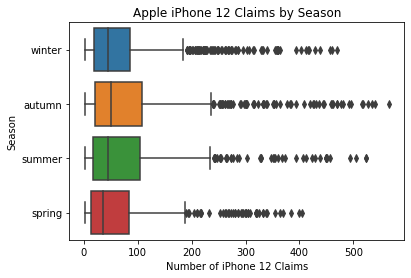

In [23]:
# Boxplot from seaborn
sns.boxplot(data=apple[apple["model_group"] == "iphone 12"], x="claim", y="season")

plt.xlabel("Number of iPhone 12 Claims") 
plt.ylabel("Season")  

plt.title("Apple iPhone 12 Claims by Season")

# This is a boxplot on all individual iPhone 12 claims data - the data is not yet aggregated

In [24]:
# Outliers for iphone 12 Winter
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 12") & (apple["season"] == "winter")] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iphone 12 Autumn
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 12") & (apple["season"] == "autumn")] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iphone 12 Summer
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 12") & (apple["season"] == "summer")] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iphone 12 Spring
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 12") & (apple["season"] == "spring")] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
3117,apple iphone 12 pro max,128gb,blue,415,2022-12-26,December,2022,winter,Q4,True,apple,iphone 12,3.982271
3119,apple iphone 12 pro max,128gb,gray,460,2022-12-26,December,2022,winter,Q4,True,apple,iphone 12,4.508106
3121,apple iphone 12 pro max,256gb,blue,331,2022-12-26,December,2022,winter,Q4,True,apple,iphone 12,3.000712
3262,apple iphone 12 pro max,128gb,blue,470,2023-01-02,January,2023,winter,Q1,True,apple,iphone 12,4.624958
3264,apple iphone 12 pro max,128gb,gray,438,2023-01-02,January,2023,winter,Q1,True,apple,iphone 12,4.251031
3266,apple iphone 12 pro max,256gb,blue,359,2023-01-02,January,2023,winter,Q1,True,apple,iphone 12,3.327899
3421,apple iphone 12 pro max,128gb,blue,364,2023-01-09,January,2023,winter,Q1,False,apple,iphone 12,3.386325
3423,apple iphone 12 pro max,128gb,gray,355,2023-01-09,January,2023,winter,Q1,False,apple,iphone 12,3.281158
3424,apple iphone 12 pro max,256gb,blue,361,2023-01-09,January,2023,winter,Q1,False,apple,iphone 12,3.351269
3579,apple iphone 12 pro max,128gb,blue,457,2023-01-16,January,2023,winter,Q1,True,apple,iphone 12,4.473050


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
165,apple iphone 12 pro max,128gb,blue,491,2022-11-14,November,2022,autumn,Q4,False,apple,iphone 12,4.090182
167,apple iphone 12 pro max,128gb,gray,535,2022-11-14,November,2022,autumn,Q4,False,apple,iphone 12,4.534131
169,apple iphone 12 pro max,256gb,blue,431,2022-11-14,November,2022,autumn,Q4,False,apple,iphone 12,3.484798
322,apple iphone 12 pro max,128gb,blue,425,2022-11-21,November,2022,autumn,Q4,True,apple,iphone 12,3.424259
324,apple iphone 12 pro max,128gb,gray,463,2022-11-21,November,2022,autumn,Q4,True,apple,iphone 12,3.807670
479,apple iphone 12 pro max,128gb,blue,566,2022-11-28,November,2022,autumn,Q4,False,apple,iphone 12,4.846913
481,apple iphone 12 pro max,128gb,gray,427,2022-11-28,November,2022,autumn,Q4,False,apple,iphone 12,3.444439
636,apple iphone 12 pro max,128gb,blue,469,2022-12-12,December,2022,autumn,Q4,False,apple,iphone 12,3.868208
638,apple iphone 12 pro max,128gb,gray,469,2022-12-12,December,2022,autumn,Q4,False,apple,iphone 12,3.868208
2214,apple iphone 12 pro max,128gb,blue,517,2022-10-10,October,2022,autumn,Q4,True,apple,iphone 12,4.352516


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
951,apple iphone 12 pro max,128gb,gray,504,2022-07-25,July,2022,summer,Q3,False,apple,iphone 12,4.989258
1106,apple iphone 12 pro max,128gb,gray,523,2022-08-01,August,2022,summer,Q3,False,apple,iphone 12,5.209735
1107,apple iphone 12 pro max,256gb,blue,352,2022-08-01,August,2022,summer,Q3,False,apple,iphone 12,3.225445
1262,apple iphone 12 pro max,128gb,gray,449,2022-08-08,August,2022,summer,Q3,False,apple,iphone 12,4.351036
1264,apple iphone 12 pro max,256gb,blue,406,2022-08-08,August,2022,summer,Q3,False,apple,iphone 12,3.852063
1421,apple iphone 12 pro max,128gb,blue,494,2022-08-15,August,2022,summer,Q3,False,apple,iphone 12,4.873218
1423,apple iphone 12 pro max,128gb,gray,394,2022-08-15,August,2022,summer,Q3,False,apple,iphone 12,3.712814
1425,apple iphone 12 pro max,256gb,blue,355,2022-08-15,August,2022,summer,Q3,False,apple,iphone 12,3.260257
1581,apple iphone 12 pro max,128gb,blue,450,2022-08-29,August,2022,summer,Q3,False,apple,iphone 12,4.362640
1583,apple iphone 12 pro max,128gb,gray,412,2022-08-29,August,2022,summer,Q3,False,apple,iphone 12,3.921687


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
7158,apple iphone 12 pro max,128gb,blue,354,2022-03-21,March,2022,spring,Q1,False,apple,iphone 12,3.810201
7268,apple iphone 12 pro max,128gb,blue,363,2022-03-28,March,2022,spring,Q1,False,apple,iphone 12,3.928112
7270,apple iphone 12 pro max,128gb,gray,308,2022-03-28,March,2022,spring,Q1,False,apple,iphone 12,3.207541
7382,apple iphone 12 pro max,128gb,blue,305,2022-04-04,April,2022,spring,Q2,False,apple,iphone 12,3.168238
7384,apple iphone 12 pro max,128gb,gray,305,2022-04-04,April,2022,spring,Q2,False,apple,iphone 12,3.168238
7502,apple iphone 12 pro max,128gb,blue,322,2022-04-11,April,2022,spring,Q2,False,apple,iphone 12,3.390959
7626,apple iphone 12 pro max,128gb,blue,319,2022-04-18,April,2022,spring,Q2,False,apple,iphone 12,3.351656
7628,apple iphone 12 pro max,128gb,gray,300,2022-04-18,April,2022,spring,Q2,False,apple,iphone 12,3.102731
7764,apple iphone 12 pro max,128gb,blue,325,2022-04-25,April,2022,spring,Q2,False,apple,iphone 12,3.430263
7892,apple iphone 12 pro max,128gb,blue,299,2022-05-02,May,2022,spring,Q2,False,apple,iphone 12,3.089630


#### EDA on iPhone 12 by Aggregating Claims Data for Each Weeks_Monday Sub-Section - Season

In [25]:
iphone_12 = apple[apple["model_group"] == "iphone 12"]

result_iphone_12 = iphone_12.groupby(['season', 'weeks_monday'], as_index = False).agg({'claim': np.sum})

print(result_iphone_12)

    season weeks_monday  claim
0   autumn   2021-09-27   1706
1   autumn   2021-10-04   1895
2   autumn   2021-10-11   1903
3   autumn   2021-10-18   1935
4   autumn   2021-10-25   1905
..     ...          ...    ...
81  winter   2023-01-16   4277
82  winter   2023-01-23   4136
83  winter   2023-01-30   3764
84  winter   2023-02-06   4604
85  winter   2023-02-13    807

[86 rows x 3 columns]


Text(0.5, 1.0, 'Apple iphone 12 Claims by Season')

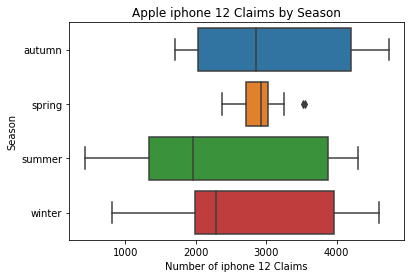

In [26]:
# Boxplot from seaborn
sns.boxplot(data=result_iphone_12, x="claim", y="season")

plt.xlabel("Number of iphone 12 Claims")
plt.ylabel("Season")

plt.title("Apple iphone 12 Claims by Season")

# This is a more proper graphic - representing all iPhone 12 Claims data through weeks_monday aggregation

In [27]:
result_iphone_12_spring = result_iphone_12.copy()

spring_iphone12 = result_iphone_12_spring[result_iphone_12_spring["season"] == "spring"]

display(spring_iphone12)

spring_iphone12['z_score'] = stats.zscore(spring_iphone12['claim'])
outliers_spring_iphone12 = spring_iphone12[(spring_iphone12['z_score'] > 1.5) | (spring_iphone12['z_score'] < -3)]
display(outliers_spring_iphone12)

# Note: Outliers for boxplots are when they are outside of the 1.5 * IQR range, this doesn't necessarily match up to the z-score
# definition, so the z-score value cut-offs have been slightly adjusted so we can identify the data point that fell out of range
# for the boxplots

,season,weeks_monday,claim
26,spring,2022-03-21,2691
27,spring,2022-03-28,2898
28,spring,2022-04-04,2646
29,spring,2022-04-11,2372
30,spring,2022-04-18,2725
31,spring,2022-04-25,2718
32,spring,2022-05-02,2798
33,spring,2022-05-09,2980
34,spring,2022-05-16,2955
35,spring,2022-05-23,3258


/tmp/ipykernel_19630/3158894549.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spring_iphone12['z_score'] = stats.zscore(spring_iphone12['claim'])


,season,weeks_monday,claim,z_score
37,spring,2022-06-06,3553,1.929390
38,spring,2022-06-13,3528,1.851014


In [28]:
iphone12_stats = result_iphone_12.groupby(['season']).agg({'claim': ['mean', 'min', 'max']})
print(iphone12_stats)

              claim            
               mean   min   max
season                         
autumn  3108.653846  1706  4741
spring  2937.571429  2372  3553
summer  2494.615385   422  4303
winter  2775.250000   807  4604


### EDA on iPhone 13 - Season

Text(0.5, 1.0, 'Apple iPhone 13 Claims by Season')

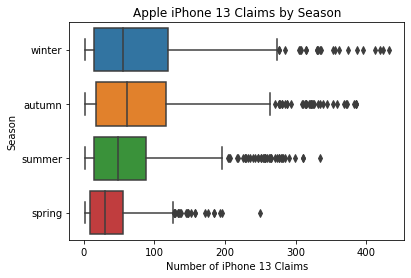

In [29]:
# Boxplot from seaborn
sns.boxplot(data=apple[apple["model_group"] == "iphone 13"], x="claim", y="season")

plt.xlabel("Number of iPhone 13 Claims") 
plt.ylabel("Season")  

plt.title("Apple iPhone 13 Claims by Season")
# This is a boxplot on all individual iPhone 13 claims data - the data is not yet aggregated

In [30]:
# Outliers for iphone 13 Winter
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 13") & (apple["season"] == "winter")] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iphone 13 Autumn
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 13") & (apple["season"] == "autumn")] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iphone 13 Summer
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 13") & (apple["season"] == "summer")] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iphone 13 Spring
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 13") & (apple["season"] == "spring")] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
3295,apple iphone 13 pro max,128gb,blue,420,2023-01-02,January,2023,winter,Q1,True,apple,iphone 13,3.503131
3300,apple iphone 13 pro max,256gb,blue,374,2023-01-02,January,2023,winter,Q1,True,apple,iphone 13,3.021591
3456,apple iphone 13 pro max,128gb,blue,396,2023-01-09,January,2023,winter,Q1,False,apple,iphone 13,3.251893
3613,apple iphone 13 pro max,128gb,blue,424,2023-01-16,January,2023,winter,Q1,True,apple,iphone 13,3.545004
10202,apple iphone 13 pro max,128gb,blue,432,2023-01-23,January,2023,winter,Q1,False,apple,iphone 13,3.628750
10523,apple iphone 13 pro max,128gb,blue,387,2023-02-06,February,2023,winter,Q1,False,apple,iphone 13,3.157678
10528,apple iphone 13 pro max,256gb,blue,413,2023-02-06,February,2023,winter,Q1,False,apple,iphone 13,3.429853


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
203,apple iphone 13 pro max,128gb,blue,385,2022-11-14,November,2022,autumn,Q4,False,apple,iphone 13,3.391231
205,apple iphone 13 pro max,128gb,graphite,359,2022-11-14,November,2022,autumn,Q4,False,apple,iphone 13,3.097993
208,apple iphone 13 pro max,256gb,blue,385,2022-11-14,November,2022,autumn,Q4,False,apple,iphone 13,3.391231
358,apple iphone 13 pro max,128gb,blue,353,2022-11-21,November,2022,autumn,Q4,True,apple,iphone 13,3.030322
518,apple iphone 13 pro max,128gb,blue,372,2022-11-28,November,2022,autumn,Q4,False,apple,iphone 13,3.244612
672,apple iphone 13 pro max,128gb,graphite,368,2022-12-12,December,2022,autumn,Q4,False,apple,iphone 13,3.199499
675,apple iphone 13 pro max,256gb,blue,371,2022-12-12,December,2022,autumn,Q4,False,apple,iphone 13,3.233334
2710,apple iphone 13 pro max,256gb,blue,383,2022-11-07,November,2022,autumn,Q4,True,apple,iphone 13,3.368675
2861,apple iphone 13 pro max,256gb,blue,385,2022-12-05,December,2022,autumn,Q4,False,apple,iphone 13,3.391231


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
985,apple iphone 13 pro max,128gb,blue,311,2022-07-25,July,2022,summer,Q3,False,apple,iphone 13,3.482705
1140,apple iphone 13 pro max,128gb,blue,335,2022-08-01,August,2022,summer,Q3,False,apple,iphone 13,3.825396
1142,apple iphone 13 pro max,128gb,graphite,279,2022-08-01,August,2022,summer,Q3,False,apple,iphone 13,3.025782
1298,apple iphone 13 pro max,128gb,blue,311,2022-08-08,August,2022,summer,Q3,False,apple,iphone 13,3.482705
1620,apple iphone 13 pro max,128gb,blue,281,2022-08-29,August,2022,summer,Q3,False,apple,iphone 13,3.054340
1937,apple iphone 13 pro max,128gb,blue,282,2022-09-19,September,2022,summer,Q3,False,apple,iphone 13,3.068619
9425,apple iphone 13 pro max,128gb,blue,291,2022-07-18,July,2022,summer,Q3,False,apple,iphone 13,3.197128
9585,apple iphone 13 pro max,128gb,blue,285,2022-08-22,August,2022,summer,Q3,False,apple,iphone 13,3.111455
9744,apple iphone 13 pro max,128gb,blue,299,2022-09-12,September,2022,summer,Q3,False,apple,iphone 13,3.311359


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
8492,apple iphone 13 pro max,128gb,blue,185,2022-05-30,May,2022,spring,Q2,True,apple,iphone 13,3.303465
8650,apple iphone 13 pro max,128gb,blue,193,2022-06-06,June,2022,spring,Q2,False,apple,iphone 13,3.488931
8806,apple iphone 13 pro max,128gb,blue,176,2022-06-13,June,2022,spring,Q2,False,apple,iphone 13,3.094816
8808,apple iphone 13 pro max,128gb,graphite,172,2022-06-13,June,2022,spring,Q2,False,apple,iphone 13,3.002084
8811,apple iphone 13 pro max,256gb,blue,185,2022-06-13,June,2022,spring,Q2,False,apple,iphone 13,3.303465
8963,apple iphone 13 pro max,128gb,blue,250,2022-06-20,June,2022,spring,Q2,False,apple,iphone 13,4.810372
8965,apple iphone 13 pro max,128gb,graphite,196,2022-06-20,June,2022,spring,Q2,False,apple,iphone 13,3.558480


#### EDA on iPhone 13 by Aggregating Claims Data for Each Weeks_Monday Sub-Section - Season

In [31]:
iphone_13 = apple[apple["model_group"] == "iphone 13"]

result_iphone_13 = iphone_13.groupby(['season', 'weeks_monday'], as_index = False).agg({'claim': np.sum})

print(result_iphone_13)


    season weeks_monday  claim
0   autumn   2021-11-15      2
1   autumn   2021-11-22      3
2   autumn   2021-11-29      6
3   autumn   2021-12-06      2
4   autumn   2021-12-13     10
..     ...          ...    ...
61  winter   2023-01-16   3828
62  winter   2023-01-23   4090
63  winter   2023-01-30   3740
64  winter   2023-02-06   4270
65  winter   2023-02-13    847

[66 rows x 3 columns]


Text(0.5, 1.0, 'Apple iPhone 13 Claims by Season')

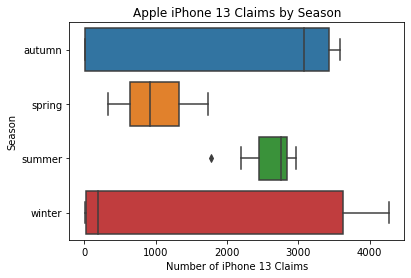

In [32]:
# Boxplot from seaborn
sns.boxplot(data=result_iphone_13, x="claim", y="season")

plt.xlabel("Number of iPhone 13 Claims")
plt.ylabel("Season")

plt.title("Apple iPhone 13 Claims by Season")

# This is a more proper graphic - representing all iPhone 13 Claims data through weeks_monday aggregation

In [33]:
result_iphone_13_summer = result_iphone_13.copy()

summer_iphone13 = result_iphone_13_summer[result_iphone_13_summer["season"] == "summer"]

display(summer_iphone13)

summer_iphone13['z_score'] = stats.zscore(summer_iphone13['claim'])
outliers_summer_iphone13 = summer_iphone13[(summer_iphone13['z_score'] > 3) | (summer_iphone13['z_score'] < -2)]
display(outliers_summer_iphone13)

# Note: Outliers for boxplots are when they are outside of the 1.5 * IQR range, this doesn't necessarily match up to the z-score
# definition, so the z-score value cut-offs have been slightly adjusted so we can identify the data point that fell out of range
# for the boxplots

,season,weeks_monday,claim
33,summer,2022-06-27,1776
34,summer,2022-07-04,2197
35,summer,2022-07-11,2228
36,summer,2022-07-18,2446
37,summer,2022-07-25,2724
38,summer,2022-08-01,2791
39,summer,2022-08-08,2840
40,summer,2022-08-15,2771
41,summer,2022-08-22,2745
42,summer,2022-08-29,2835


/tmp/ipykernel_19630/3237652627.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_iphone13['z_score'] = stats.zscore(summer_iphone13['claim'])


,season,weeks_monday,claim,z_score
33,summer,2022-06-27,1776,-2.501217


In [34]:
iphone13_stats = result_iphone_13.groupby(['season']).agg({'claim': ['mean', 'min', 'max']})
print(iphone13_stats)

              claim            
               mean   min   max
season                         
autumn  2201.105263     2  3585
spring  1014.071429   333  1732
summer  2611.461538  1776  2973
winter  1387.050000     7  4270


### EDA on iPhone 14 - Season

Text(0.5, 1.0, 'Apple iPhone 14 Claims by Season')

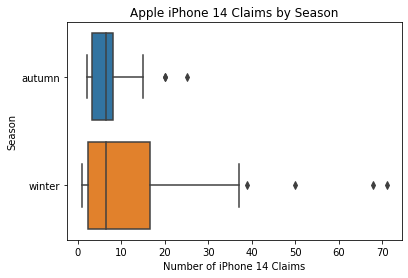

In [35]:
# Boxplot from seaborn
sns.boxplot(data=apple[apple["model_group"] == "iphone 14"], x="claim", y="season")

plt.xlabel("Number of iPhone 14 Claims") 
plt.ylabel("Season")  

plt.title("Apple iPhone 14 Claims by Season")

# This is a boxplot on all individual iPhone 14 claims data - the data is not yet aggregated

In [36]:
# Outliers for iphone 14 Winter
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 14") & (apple["season"] == "winter")] ['claim'])
outliers = data[(data['z_score'] > 1.4) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iphone 14 Autumn
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 14") & (apple["season"] == "autumn")] ['claim'])
outliers = data[(data['z_score'] > 1.5) | (data['z_score'] < -3)]
display(outliers)

,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
10214,apple iphone 14,128gb,black,39,2023-01-23,January,2023,winter,Q1,False,apple,iphone 14,1.485622
10541,apple iphone 14 pro max,128gb,black,71,2023-02-06,February,2023,winter,Q1,False,apple,iphone 14,3.370826
10542,apple iphone 14 pro max,128gb,gold,50,2023-02-06,February,2023,winter,Q1,False,apple,iphone 14,2.133661
10543,apple iphone 14 pro max,128gb,purple,68,2023-02-06,February,2023,winter,Q1,False,apple,iphone 14,3.194088


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
684,apple iphone 14,128gb,black,20,2022-12-12,December,2022,autumn,Q4,False,apple,iphone 14,1.898974
2871,apple iphone 14,128gb,black,25,2022-12-05,December,2022,autumn,Q4,False,apple,iphone 14,2.681322
3014,apple iphone 14,128gb,black,20,2022-12-19,December,2022,autumn,Q4,False,apple,iphone 14,1.898974


#### EDA on iPhone 14 by Aggregating Claims Data for Each Weeks_Monday Sub-Section - Season

In [37]:
iphone_14 = apple[apple["model_group"] == "iphone 14"]

result_iphone_14 = iphone_14.groupby(['season', 'weeks_monday'], as_index = False).agg({'claim': np.sum})

print(result_iphone_14)

    season weeks_monday  claim
0   autumn   2022-11-14      9
1   autumn   2022-11-21     30
2   autumn   2022-11-28     23
3   autumn   2022-12-05     43
4   autumn   2022-12-12     32
5   autumn   2022-12-19     36
6   winter   2022-12-26     44
7   winter   2023-01-02     45
8   winter   2023-01-09     59
9   winter   2023-01-16     60
10  winter   2023-01-23     57
11  winter   2023-01-30     54
12  winter   2023-02-06    251
13  winter   2023-02-13     64


Text(0.5, 1.0, 'Apple iPhone 14 Claims by Season')

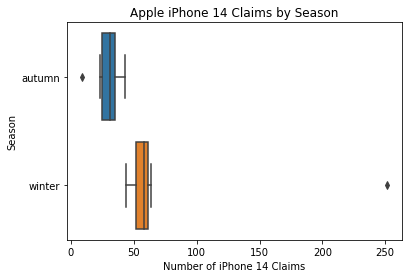

In [38]:
# Boxplot from seaborn
sns.boxplot(data=result_iphone_14, x="claim", y="season")

plt.xlabel("Number of iPhone 14 Claims")
plt.ylabel("Season")

plt.title("Apple iPhone 14 Claims by Season")

# This is a more proper graphic - representing all iPhone 14 Claims data through weeks_monday aggregation

In [39]:
result_iphone_14_autumn = result_iphone_14.copy()

autumn_iphone14 = result_iphone_14_autumn[result_iphone_14_autumn["season"] == "autumn"]

display(autumn_iphone14)

autumn_iphone14['z_score'] = stats.zscore(autumn_iphone14['claim'])
outliers_autumn_iphone14 = autumn_iphone14[(autumn_iphone14['z_score'] > 3) | (autumn_iphone14['z_score'] < -1.5)]
display(outliers_autumn_iphone14)

result_iphone_14_winter = result_iphone_14.copy()

winter_iphone14 = result_iphone_14_winter[result_iphone_14_winter["season"] == "winter"]

display(winter_iphone14)

winter_iphone14['z_score'] = stats.zscore(winter_iphone14['claim'])
outliers_winter_iphone14 = winter_iphone14[(winter_iphone14['z_score'] > 2) | (winter_iphone14['z_score'] < -3)]
display(outliers_winter_iphone14)

# Note: Outliers for boxplots are when they are outside of the 1.5 * IQR range, this doesn't necessarily match up to the z-score
# definition, so the z-score value cut-offs have been slightly adjusted so we can identify the data point that fell out of range
# for the boxplots

,season,weeks_monday,claim
0,autumn,2022-11-14,9
1,autumn,2022-11-21,30
2,autumn,2022-11-28,23
3,autumn,2022-12-05,43
4,autumn,2022-12-12,32
5,autumn,2022-12-19,36


/tmp/ipykernel_19630/2551086000.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autumn_iphone14['z_score'] = stats.zscore(autumn_iphone14['claim'])


,season,weeks_monday,claim,z_score
0,autumn,2022-11-14,9,-1.848352


,season,weeks_monday,claim
6,winter,2022-12-26,44
7,winter,2023-01-02,45
8,winter,2023-01-09,59
9,winter,2023-01-16,60
10,winter,2023-01-23,57
11,winter,2023-01-30,54
12,winter,2023-02-06,251
13,winter,2023-02-13,64


/tmp/ipykernel_19630/2551086000.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_iphone14['z_score'] = stats.zscore(winter_iphone14['claim'])


,season,weeks_monday,claim,z_score
12,winter,2023-02-06,251,2.632223


In [40]:
iphone14_stats = result_iphone_14.groupby(['season']).agg({'claim': ['mean', 'min', 'max']})
print(iphone14_stats)

            claim         
             mean min  max
season                    
autumn  28.833333   9   43
winter  79.250000  44  251


## EDA on Model and Quarter Section

### EDA on Quarter Row Count by Model

Count
model_group quarter       
iphone 11   Q1         677
            Q2         504
            Q3         940
            Q4         906
iphone 12   Q1         757
            Q2         629
            Q3         885
            Q4         948
iphone 13   Q1         317
            Q2         353
            Q3         508
            Q4         483
iphone 14   Q1          41
            Q4          27
iphone x    Q1         624
            Q2         448
            Q3         841
            Q4         833

Total number of rows in the apple quarter table above is 10721


Count
model_group quarter       
iphone 12   Q4         948
iphone 11   Q3         940
            Q4         906
iphone 12   Q3         885
iphone x    Q3         841
            Q4         833
iphone 12   Q1         757
iphone 11   Q1         677
iphone 12   Q2         629
iphone x    Q1         624
iphone 13   Q3         508
iphone 11   Q2         504
iphone 13   Q4         483
iphone x    Q2         448
iphone 13   Q2         353
            Q1         317
iphone 14   Q1          41
            Q4          27

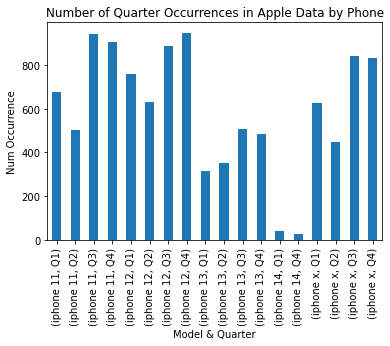

In [41]:
apple_quarter = apple.groupby(['model_group', 'quarter'])

apple_quarter_count = apple_quarter.agg(Count =('quarter', 'count'))

display(apple_quarter_count)
print("Total number of rows in the apple quarter table above is", sum(apple_quarter_count["Count"]))

apple_graphic1 = apple_quarter_count.plot(y="Count", kind="bar", title = "Number of Quarter Occurrences in Apple Data by Phone", rot=90)
apple_graphic1.set(xlabel="Model & Quarter", ylabel="Num Occurrence")
# Remove the legend that is auto-generated
apple_graphic1.legend('', frameon=False)

apple_quarter_count.groupby(['model_group', 'quarter']).max().sort_values(by = 'Count', ascending = False)

# The table shows the number of entries we have per quarter based on iphone model

### EDA on Total Claims by Model and Quarter

                     Sum_Claim
model_group quarter           
iphone 11   Q1           43347
            Q2           32204
            Q3           79226
            Q4           74055
iphone 12   Q1           55156
            Q2           38136
            Q3           67327
            Q4           81697
iphone 13   Q1           25948
            Q2           15135
            Q3           34894
            Q4           41731
iphone 14   Q1             590
            Q4             217
iphone x    Q1           23870
            Q2           15634
            Q3           49313
            Q4           41374


Sum_Claim
model_group quarter           
iphone 12   Q4           81697
iphone 11   Q3           79226
            Q4           74055
iphone 12   Q3           67327
            Q1           55156
iphone x    Q3           49313
iphone 11   Q1           43347
iphone 13   Q4           41731
iphone x    Q4           41374
iphone 12   Q2           38136
iphone 13   Q3           34894
iphone 11   Q2           32204
iphone 13   Q1           25948
iphone x    Q1           23870
            Q2           15634
iphone 13   Q2           15135
iphone 14   Q1             590
            Q4             217

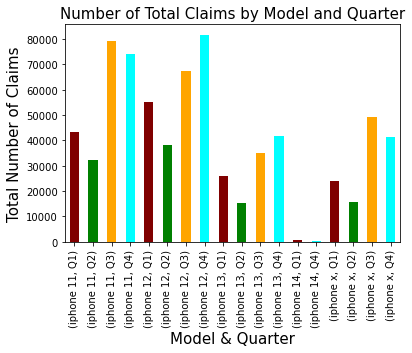

In [42]:

total_claims_quarter_model = apple.groupby(['model_group', 'quarter'])

total_claims_quarter_model_count = total_claims_quarter_model.agg(Sum_Claim =('claim', np.sum))

print(total_claims_quarter_model_count)

# Showing the exact claim numbers by quarter
total_claims_quarter_model_count.plot.bar(y="Sum_Claim", color = ['maroon', 'green', 'orange', 'cyan', 'maroon', 'green', 'orange', 'cyan','maroon', 'green', 'orange', 'cyan','maroon', 'cyan', 'maroon', 'green', 'orange', 'cyan'], rot=90)
plt.xlabel("Model & Quarter",  size = 15)
plt.ylabel("Total Number of Claims", size = 15)
plt.title("Number of Total Claims by Model and Quarter", size = 15)
# Remove the legend that is auto-generated
plt.legend('', frameon=False)

total_claims_quarter_model_count.groupby(['model_group', 'quarter']).max().sort_values(by = 'Sum_Claim', ascending = False)

# Total number of claims for each model_group by quarter

### Table on Claims Data by Individual Row - Quarter

In [43]:
# Mean, min, max of each model and quarter for their claims - each claim data point is not aggreagated
result = apple.groupby(['model_group', 'quarter']).agg({'claim': ['mean', 'min', 'max']})
print(result)

                         claim         
                          mean min  max
model_group quarter                    
iphone 11   Q1       64.028065   1  352
            Q2       63.896825   1  371
            Q3       84.282979   1  417
            Q4       81.738411   1  450
iphone 12   Q1       72.861295   1  470
            Q2       60.629571   1  405
            Q3       76.075706   1  524
            Q4       86.178270   1  566
iphone 13   Q1       81.854890   1  432
            Q2       42.875354   1  271
            Q3       68.688976   1  335
            Q4       86.399586   1  385
iphone 14   Q1       14.390244   1   71
            Q4        8.037037   1   25
iphone x    Q1       38.253205   1  292
            Q2       34.897321   1  209
            Q3       58.636147   1  350
            Q4       49.668667   1  353


### EDA on iPhone SE - Quarter

Text(0.5, 1.0, 'Apple iPhone SE Claims by Quarter')

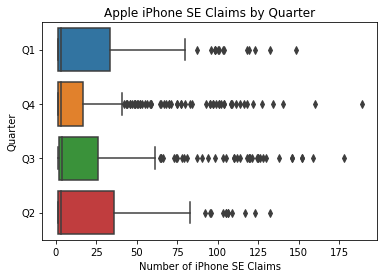

In [44]:
# Boxplot from seaborn
sns.boxplot(data=apple[apple["model_group"] == "iphone se"], x="claim", y="quarter")

plt.xlabel("Number of iPhone SE Claims") 
plt.ylabel("Quarter")  

plt.title("Apple iPhone SE Claims by Quarter")

# This is a boxplot on all individual iPhone SE claims data - the data is not yet aggregated

In [43]:
# Outliers for iPhone SE Q1
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone se") & (apple["quarter"] == "Q1")] ['claim'])
outliers = data[(data['z_score'] > 2.45) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iPhone SE Q4
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone se") & (apple["quarter"] == "Q4")] ['claim'])
outliers = data[(data['z_score'] > 2.45) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iPhone SE Q3
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone se") & (apple["quarter"] == "Q3")] ['claim'])
outliers = data[(data['z_score'] > 2.45) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iPhone SE Q2
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone se") & (apple["quarter"] == "Q2")] ['claim'])
outliers = data[(data['z_score'] > 2.45) | (data['z_score'] < -3)]
display(outliers)

,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
69,apple iphone se 2020,64gb,black,104,2022-01-24,January,2022,winter,Q1,False,apple,iphone se,2.625821
3755,apple iphone se 2020,64gb,black,123,2023-01-09,January,2023,winter,Q1,False,apple,iphone se,3.225879
3922,apple iphone se 2020,64gb,black,148,2023-01-16,January,2023,winter,Q1,True,apple,iphone se,4.015430
6724,apple iphone se 2020,64gb,black,100,2022-01-03,January,2022,winter,Q1,False,apple,iphone se,2.499493
7158,apple iphone se 2020,64gb,black,119,2022-02-07,February,2022,winter,Q1,False,apple,iphone se,3.099551
7485,apple iphone se 2020,64gb,black,101,2022-02-28,February,2022,winter,Q1,False,apple,iphone se,2.531075
7611,apple iphone se 2020,64gb,black,103,2022-03-07,March,2022,winter,Q1,False,apple,iphone se,2.594239
7733,apple iphone se 2020,64gb,black,118,2022-03-14,March,2022,winter,Q1,False,apple,iphone se,3.067969
11160,apple iphone se 2020,64gb,black,132,2023-01-23,January,2023,winter,Q1,False,apple,iphone se,3.510118


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
2447,apple iphone se 2020,64gb,black,160,2022-10-10,October,2022,autumn,Q4,True,apple,iphone se,4.128819
2623,apple iphone se 2020,64gb,black,134,2022-10-17,October,2022,autumn,Q4,False,apple,iphone se,3.364120
2802,apple iphone se 2020,64gb,black,140,2022-10-31,October,2022,autumn,Q4,False,apple,iphone se,3.540589
2969,apple iphone se 2020,64gb,black,189,2022-11-07,November,2022,autumn,Q4,True,apple,iphone se,4.981752
5358,apple iphone se 2020,64gb,black,104,2021-10-04,October,2021,autumn,Q4,False,apple,iphone se,2.481775
5553,apple iphone se 2020,64gb,black,108,2021-10-18,October,2021,autumn,Q4,False,apple,iphone se,2.599421
5649,apple iphone se 2020,64gb,black,109,2021-10-25,October,2021,autumn,Q4,False,apple,iphone se,2.628832
5752,apple iphone se 2020,64gb,black,116,2021-11-01,November,2021,autumn,Q4,False,apple,iphone se,2.834713
5856,apple iphone se 2020,64gb,black,122,2021-11-08,November,2021,autumn,Q4,True,apple,iphone se,3.011182
5960,apple iphone se 2020,64gb,black,114,2021-11-15,November,2021,autumn,Q4,False,apple,iphone se,2.775890


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
891,apple iphone se 2020,64gb,black,152,2022-07-04,July,2022,summer,Q3,True,apple,iphone se,3.517551
1061,apple iphone se 2020,64gb,black,146,2022-07-25,July,2022,summer,Q3,False,apple,iphone se,3.355235
1233,apple iphone se 2020,64gb,black,125,2022-08-01,August,2022,summer,Q3,False,apple,iphone se,2.787126
1405,apple iphone se 2020,64gb,black,178,2022-08-08,August,2022,summer,Q3,False,apple,iphone se,4.220924
1581,apple iphone se 2020,64gb,black,121,2022-08-15,August,2022,summer,Q3,False,apple,iphone se,2.678915
1929,apple iphone se 2020,64gb,black,130,2022-09-05,September,2022,summer,Q3,True,apple,iphone se,2.922390
2104,apple iphone se 2020,64gb,black,128,2022-09-19,September,2022,summer,Q3,False,apple,iphone se,2.868284
2275,apple iphone se 2020,64gb,black,118,2022-09-26,September,2022,autumn,Q3,False,apple,iphone se,2.597757
4109,apple iphone se 2020,64gb,black,119,2021-07-05,July,2021,summer,Q3,True,apple,iphone se,2.624809
4377,apple iphone se 2020,64gb,black,124,2021-07-26,July,2021,summer,Q3,False,apple,iphone se,2.760073


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
8099,apple iphone se 2020,64gb,black,109,2022-04-04,April,2022,spring,Q2,False,apple,iphone se,2.614083
8371,apple iphone se 2020,64gb,black,105,2022-04-18,April,2022,spring,Q2,False,apple,iphone se,2.493430
8516,apple iphone se 2020,64gb,black,106,2022-04-25,April,2022,spring,Q2,False,apple,iphone se,2.523593
8801,apple iphone se 2020,64gb,black,105,2022-05-09,May,2022,spring,Q2,False,apple,iphone se,2.493430
9113,apple iphone se 2020,64gb,black,117,2022-05-23,May,2022,spring,Q2,False,apple,iphone se,2.855390
9611,apple iphone se 2020,64gb,black,106,2022-06-13,June,2022,spring,Q2,False,apple,iphone se,2.523593
9781,apple iphone se 2020,64gb,black,132,2022-06-20,June,2022,spring,Q2,False,apple,iphone se,3.307839
9948,apple iphone se 2020,64gb,black,123,2022-06-27,June,2022,summer,Q2,False,apple,iphone se,3.036369


#### EDA on iPhone SE by Aggregating Claims Data for Each Weeks_Monday Sub-Section - Quarter

In [46]:
iphone_se = apple[apple["model_group"] == "iphone se"]

result_iphone_se = iphone_se.groupby(['quarter', 'weeks_monday'], as_index = False).agg({'claim': np.sum})

print(result_iphone_se)


   quarter weeks_monday  claim
0       Q1   2022-01-03    263
1       Q1   2022-01-10    220
2       Q1   2022-01-17    240
3       Q1   2022-01-24    235
4       Q1   2022-01-31    191
..     ...          ...    ...
81      Q4   2022-11-28     65
82      Q4   2022-12-05     55
83      Q4   2022-12-12     31
84      Q4   2022-12-19     42
85      Q4   2022-12-26     46

[86 rows x 3 columns]


Text(0.5, 1.0, 'Apple iPhone SE Claims by Quarter')

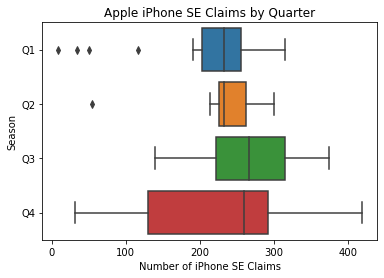

In [48]:
# Boxplot from seaborn
sns.boxplot(data=result_iphone_se, x="claim", y="quarter")

plt.xlabel("Number of iPhone SE Claims") 
plt.ylabel("Season")

plt.title("Apple iPhone SE Claims by Quarter")

# This is a more proper graphic - representing all iPhone SE Claims data through weeks_monday aggregation

In [58]:
result_iphone_se_Q1 = result_iphone_se.copy()

Q1_iphonese = result_iphone_se_Q1[result_iphone_se_Q1["quarter"] == "Q1"]

display(Q1_iphonese)

Q1_iphonese['z_score'] = stats.zscore(Q1_iphonese['claim'])
outliers_Q1_iphonese = Q1_iphonese[(Q1_iphonese['z_score'] > 3) | (Q1_iphonese['z_score'] < -1.05)]
display(outliers_Q1_iphonese)


result_iphone_se_Q2 = result_iphone_se.copy()

Q2_iphonese = result_iphone_se_Q2[result_iphone_se_Q2["quarter"] == "Q2"]

display(Q2_iphonese)

Q2_iphonese['z_score'] = stats.zscore(Q2_iphonese['claim'])
outliers_Q2_iphonese = Q2_iphonese[(Q2_iphonese['z_score'] > 3) | (Q2_iphonese['z_score'] < -3)]
display(outliers_Q2_iphonese)

# Note: Outliers for boxplots are when they are outside of the 1.5 * IQR range, this doesn't necessarily match up to the z-score
# definition, so the z-score value cut-offs have been slightly adjusted so we can identify the data point that fell out of range
# for the boxplots

,quarter,weeks_monday,claim
0,Q1,2022-01-03,263
1,Q1,2022-01-10,220
2,Q1,2022-01-17,240
3,Q1,2022-01-24,235
4,Q1,2022-01-31,191
5,Q1,2022-02-07,256
6,Q1,2022-02-14,221
7,Q1,2022-02-21,207
8,Q1,2022-02-28,236
9,Q1,2022-03-07,257


/tmp/ipykernel_20853/1125309475.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q1_iphonese['z_score'] = stats.zscore(Q1_iphonese['claim'])


,quarter,weeks_monday,claim,z_score
13,Q1,2023-01-02,50,-1.873458
17,Q1,2023-01-30,117,-1.060494
18,Q1,2023-02-06,34,-2.067599
19,Q1,2023-02-13,8,-2.383078


,quarter,weeks_monday,claim
20,Q2,2021-06-28,55
21,Q2,2022-04-04,231
22,Q2,2022-04-11,214
23,Q2,2022-04-18,250
24,Q2,2022-04-25,227
25,Q2,2022-05-02,221
26,Q2,2022-05-09,251
27,Q2,2022-05-16,235
28,Q2,2022-05-23,266
29,Q2,2022-05-30,230


/tmp/ipykernel_20853/1125309475.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q2_iphonese['z_score'] = stats.zscore(Q2_iphonese['claim'])


,quarter,weeks_monday,claim,z_score
20,Q2,2021-06-28,55,-3.221442


In [59]:
iphonese_stats = result_iphone_se.groupby(['quarter']).agg({'claim': ['mean', 'min', 'max']})
print(iphonese_stats)

              claim          
               mean  min  max
quarter                      
Q1       204.400000    8  315
Q2       232.928571   55  300
Q3       265.384615  140  375
Q4       231.653846   31  419


### EDA on iPhone X - Quarter

Text(0.5, 1.0, 'Apple iPhone X Claims by Quarter')

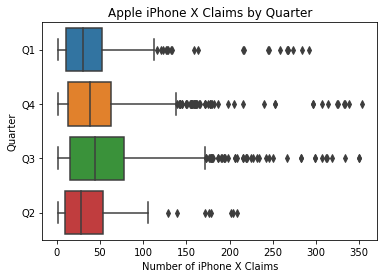

In [44]:
# Boxplot from seaborn
sns.boxplot(data=apple[apple["model_group"] == "iphone x"], x="claim", y="quarter")

plt.xlabel("Number of iPhone X Claims") 
plt.ylabel("Quarter")  

plt.title("Apple iPhone X Claims by Quarter")

# This is a boxplot on all individual iPhone X claims data - the data is not yet aggregated

In [45]:
# Outliers for iPhone X Q1
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone x") & (apple["quarter"] == "Q1")] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iPhone X Q4
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone x") & (apple["quarter"] == "Q4")] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iPhone X Q3
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone x") & (apple["quarter"] == "Q3")] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iPhone X Q2
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone x") & (apple["quarter"] == "Q2")] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
74,apple iphone xr,64gb,black,273,2022-01-24,January,2022,winter,Q1,False,apple,iphone x,5.721213
6175,apple iphone xr,64gb,black,292,2022-01-03,January,2022,winter,Q1,False,apple,iphone x,6.184279
6270,apple iphone xr,64gb,black,246,2022-01-10,January,2022,winter,Q1,False,apple,iphone x,5.063174
6366,apple iphone xr,64gb,black,267,2022-01-17,January,2022,winter,Q1,True,apple,iphone x,5.574982
6463,apple iphone xr,64gb,black,216,2022-01-31,January,2022,winter,Q1,False,apple,iphone x,4.332018
6560,apple iphone xr,64gb,black,268,2022-02-07,February,2022,winter,Q1,False,apple,iphone x,5.599354
6656,apple iphone xr,64gb,black,217,2022-02-14,February,2022,winter,Q1,False,apple,iphone x,4.356390
6752,apple iphone xr,64gb,black,258,2022-02-21,February,2022,winter,Q1,True,apple,iphone x,5.355636
6852,apple iphone xr,64gb,black,244,2022-02-28,February,2022,winter,Q1,False,apple,iphone x,5.014430
6967,apple iphone xr,64gb,black,284,2022-03-07,March,2022,winter,Q1,False,apple,iphone x,5.989304


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
2276,apple iphone xr,64gb,black,215,2022-10-10,October,2022,autumn,Q4,True,apple,iphone x,3.168175
4943,apple iphone xr,64gb,black,240,2021-10-04,October,2021,autumn,Q4,False,apple,iphone x,3.647240
5032,apple iphone xr,64gb,black,338,2021-10-11,October,2021,autumn,Q4,True,apple,iphone x,5.525173
5119,apple iphone xr,64gb,black,307,2021-10-18,October,2021,autumn,Q4,False,apple,iphone x,4.931133
5207,apple iphone xr,64gb,black,333,2021-10-25,October,2021,autumn,Q4,False,apple,iphone x,5.429360
5300,apple iphone xr,64gb,black,332,2021-11-01,November,2021,autumn,Q4,False,apple,iphone x,5.410197
5391,apple iphone xr,64gb,black,353,2021-11-08,November,2021,autumn,Q4,True,apple,iphone x,5.812611
5484,apple iphone xr,64gb,black,314,2021-11-15,November,2021,autumn,Q4,False,apple,iphone x,5.065271
5579,apple iphone xr,64gb,black,252,2021-11-22,November,2021,autumn,Q4,True,apple,iphone x,3.877191
5676,apple iphone xr,64gb,black,297,2021-11-29,November,2021,autumn,Q4,False,apple,iphone x,4.739507


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
3815,apple iphone xr,64gb,black,350,2021-07-05,July,2021,summer,Q3,True,apple,iphone x,4.937983
3825,apple iphone xs,64gb,gray,266,2021-07-05,July,2021,summer,Q3,True,apple,iphone x,3.514366
3897,apple iphone xr,64gb,black,299,2021-07-12,July,2021,summer,Q3,False,apple,iphone x,4.073644
3977,apple iphone xr,64gb,black,313,2021-07-19,July,2021,summer,Q3,False,apple,iphone x,4.310913
4057,apple iphone xr,64gb,black,282,2021-07-26,July,2021,summer,Q3,False,apple,iphone x,3.785531
4144,apple iphone xr,64gb,black,307,2021-08-02,August,2021,summer,Q3,False,apple,iphone x,4.209226
4233,apple iphone xr,64gb,black,299,2021-08-09,August,2021,summer,Q3,False,apple,iphone x,4.073644
4243,apple iphone xs,64gb,gray,242,2021-08-09,August,2021,summer,Q3,False,apple,iphone x,3.107618
4324,apple iphone xr,64gb,black,350,2021-08-16,August,2021,summer,Q3,False,apple,iphone x,4.937983
4415,apple iphone xr,64gb,black,333,2021-08-23,August,2021,summer,Q3,False,apple,iphone x,4.649870


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
7415,apple iphone xr,64gb,black,202,2022-04-04,April,2022,spring,Q2,False,apple,iphone x,5.285187
7533,apple iphone xr,64gb,black,171,2022-04-11,April,2022,spring,Q2,False,apple,iphone x,4.304707
8368,apple iphone xr,64gb,black,176,2022-05-23,May,2022,spring,Q2,False,apple,iphone x,4.462849
8521,apple iphone xr,64gb,black,139,2022-05-30,May,2022,spring,Q2,True,apple,iphone x,3.292599
8677,apple iphone xr,64gb,black,178,2022-06-06,June,2022,spring,Q2,False,apple,iphone x,4.526106
8833,apple iphone xr,64gb,black,209,2022-06-13,June,2022,spring,Q2,False,apple,iphone x,5.506586
8988,apple iphone xr,64gb,black,204,2022-06-20,June,2022,spring,Q2,False,apple,iphone x,5.348444


#### EDA on iPhone X by Aggregating Claims Data for Each Weeks_Monday Sub-Section - Quarter

In [46]:
iphone_10 = apple[apple["model_group"] == "iphone x"]

result_iphone_10 = iphone_10.groupby(['quarter', 'weeks_monday'], as_index = False).agg({'claim': np.sum})

print(result_iphone_10)

   quarter weeks_monday  claim
0       Q1   2022-01-03   1837
1       Q1   2022-01-10   1635
2       Q1   2022-01-17   1704
3       Q1   2022-01-24   1465
4       Q1   2022-01-31   1448
..     ...          ...    ...
81      Q4   2022-11-28   1173
82      Q4   2022-12-05   1005
83      Q4   2022-12-12   1002
84      Q4   2022-12-19    960
85      Q4   2022-12-26    900

[86 rows x 3 columns]


Text(0.5, 1.0, 'Apple iPhone X Claims by Quarter')

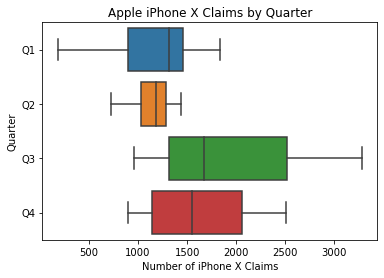

In [47]:
# Boxplot from seaborn
sns.boxplot(data=result_iphone_10, x="claim", y="quarter")

plt.xlabel("Number of iPhone X Claims") 
plt.ylabel("Quarter")

plt.title("Apple iPhone X Claims by Quarter")

# This is a more proper graphic - representing all iPhone X Claims data through weeks_monday aggregation

In [48]:
iphoneX_stats = result_iphone_10.groupby(['quarter']).agg({'claim': ['mean', 'min', 'max']})
print(iphoneX_stats)

               claim           
                mean  min   max
quarter                        
Q1       1193.500000  179  1837
Q2       1116.714286  721  1433
Q3       1896.653846  957  3280
Q4       1591.307692  900  2504


### EDA on iPhone 11 - Quarter

Text(0.5, 1.0, 'Apple iPhone 11 Claims by Quarter')

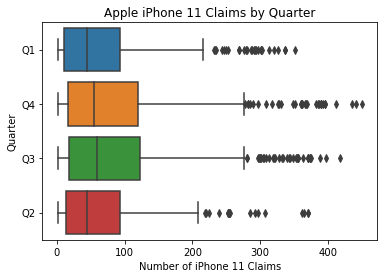

In [49]:
# Boxplot from seaborn
sns.boxplot(data=apple[apple["model_group"] == "iphone 11"], x="claim", y="quarter")

plt.xlabel("Number of iPhone 11 Claims") 
plt.ylabel("Quarter")  

plt.title("Apple iPhone 11 Claims by Quarter")

# This is a boxplot on all individual iPhone 11 claims data - the data is not yet aggregated

In [50]:

# Outliers for iphone 11 Q1
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 11") & (apple["quarter"] == "Q1")] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iphone 11 Q4
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 11") & (apple["quarter"] == "Q4")] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iphone 11 Q3
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 11") & (apple["quarter"] == "Q3")] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iphone 11 Q2
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 11") & (apple["quarter"] == "Q2")] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
11,apple iphone 11,64gb,black,291,2022-01-24,January,2022,winter,Q1,False,apple,iphone 11,3.338976
3198,apple iphone 11,64gb,black,301,2023-01-02,January,2023,winter,Q1,True,apple,iphone 11,3.486085
3360,apple iphone 11,64gb,black,313,2023-01-09,January,2023,winter,Q1,False,apple,iphone 11,3.662617
3522,apple iphone 11,64gb,black,276,2023-01-16,January,2023,winter,Q1,True,apple,iphone 11,3.118311
6096,apple iphone 11,128gb,black,301,2022-01-03,January,2022,winter,Q1,False,apple,iphone 11,3.486085
6107,apple iphone 11,64gb,black,352,2022-01-03,January,2022,winter,Q1,False,apple,iphone 11,4.236344
6194,apple iphone 11,128gb,black,286,2022-01-10,January,2022,winter,Q1,False,apple,iphone 11,3.265421
6206,apple iphone 11,64gb,black,280,2022-01-10,January,2022,winter,Q1,False,apple,iphone 11,3.177155
6302,apple iphone 11,64gb,black,294,2022-01-17,January,2022,winter,Q1,True,apple,iphone 11,3.383108
6397,apple iphone 11,64gb,black,337,2022-01-31,January,2022,winter,Q1,False,apple,iphone 11,4.015680


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
105,apple iphone 11,64gb,black,383,2022-11-14,November,2022,autumn,Q4,False,apple,iphone 11,3.529967
419,apple iphone 11,64gb,black,351,2022-11-28,November,2022,autumn,Q4,False,apple,iphone 11,3.155014
583,apple iphone 11,64gb,black,385,2022-12-12,December,2022,autumn,Q4,False,apple,iphone 11,3.553402
2157,apple iphone 11,64gb,black,450,2022-10-10,October,2022,autumn,Q4,True,apple,iphone 11,4.315025
2308,apple iphone 11,64gb,black,389,2022-10-17,October,2022,autumn,Q4,False,apple,iphone 11,3.600271
2461,apple iphone 11,64gb,black,396,2022-10-31,October,2022,autumn,Q4,False,apple,iphone 11,3.682292
2615,apple iphone 11,64gb,black,389,2022-11-07,November,2022,autumn,Q4,True,apple,iphone 11,3.600271
2766,apple iphone 11,64gb,black,360,2022-12-05,December,2022,autumn,Q4,False,apple,iphone 11,3.260470
2917,apple iphone 11,64gb,black,442,2022-12-19,December,2022,autumn,Q4,False,apple,iphone 11,4.221287
4889,apple iphone 11,64gb,black,362,2021-10-04,October,2021,autumn,Q4,False,apple,iphone 11,3.283904


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
890,apple iphone 11,64gb,black,388,2022-07-25,July,2022,summer,Q3,False,apple,iphone 11,3.616460
1045,apple iphone 11,64gb,black,370,2022-08-01,August,2022,summer,Q3,False,apple,iphone 11,3.402128
1198,apple iphone 11,64gb,black,344,2022-08-08,August,2022,summer,Q3,False,apple,iphone 11,3.092537
1358,apple iphone 11,64gb,black,355,2022-08-15,August,2022,summer,Q3,False,apple,iphone 11,3.223518
1520,apple iphone 11,64gb,black,375,2022-08-29,August,2022,summer,Q3,False,apple,iphone 11,3.461664
3764,apple iphone 11,64gb,black,417,2021-07-05,July,2021,summer,Q3,True,apple,iphone 11,3.961772
3847,apple iphone 11,64gb,black,370,2021-07-12,July,2021,summer,Q3,False,apple,iphone 11,3.402128
3929,apple iphone 11,64gb,black,339,2021-07-19,July,2021,summer,Q3,False,apple,iphone 11,3.033000
4009,apple iphone 11,64gb,black,355,2021-07-26,July,2021,summer,Q3,False,apple,iphone 11,3.223518
4089,apple iphone 11,64gb,black,371,2021-08-02,August,2021,summer,Q3,False,apple,iphone 11,3.414035


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
7964,apple iphone 11,64gb,black,285,2022-05-09,May,2022,spring,Q2,False,apple,iphone 11,3.332115
8103,apple iphone 11,64gb,black,293,2022-05-16,May,2022,spring,Q2,False,apple,iphone 11,3.452678
8249,apple iphone 11,64gb,black,297,2022-05-23,May,2022,spring,Q2,False,apple,iphone 11,3.512960
8399,apple iphone 11,64gb,black,307,2022-05-30,May,2022,spring,Q2,True,apple,iphone 11,3.663664
8553,apple iphone 11,64gb,black,370,2022-06-06,June,2022,spring,Q2,False,apple,iphone 11,4.613100
8709,apple iphone 11,64gb,black,362,2022-06-13,June,2022,spring,Q2,False,apple,iphone 11,4.492536
8863,apple iphone 11,64gb,black,364,2022-06-20,June,2022,spring,Q2,False,apple,iphone 11,4.522677
9019,apple iphone 11,64gb,black,371,2022-06-27,June,2022,summer,Q2,False,apple,iphone 11,4.628170


#### EDA on iPhone 11 by Aggregating Claims Data for Each Weeks_Monday Sub-Section - Quarter

In [51]:
iphone_11 = apple[apple["model_group"] == "iphone 11"]

result_iphone_11 = iphone_11.groupby(['quarter', 'weeks_monday'], as_index = False).agg({'claim': np.sum})

print(result_iphone_11)

   quarter weeks_monday  claim
0       Q1   2022-01-03   3063
1       Q1   2022-01-10   2530
2       Q1   2022-01-17   2531
3       Q1   2022-01-24   2413
4       Q1   2022-01-31   2280
..     ...          ...    ...
81      Q4   2022-11-28   2435
82      Q4   2022-12-05   2292
83      Q4   2022-12-12   2447
84      Q4   2022-12-19   2226
85      Q4   2022-12-26   1985

[86 rows x 3 columns]


Text(0.5, 1.0, 'Apple iphone 11 Claims by Quarter')

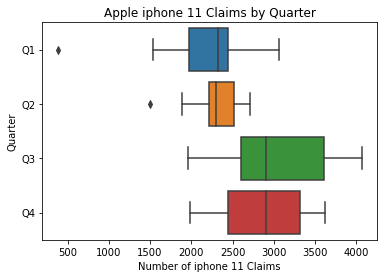

In [52]:
# Boxplot from seaborn
sns.boxplot(data=result_iphone_11, x="claim", y="quarter")

plt.xlabel("Number of iphone 11 Claims")
plt.ylabel("Quarter")

plt.title("Apple iphone 11 Claims by Quarter")

# This is a more proper graphic - representing all iPhone 11 Claims data through weeks_monday aggregation

In [53]:

result_iphone_11_Q1 = result_iphone_11.copy()

Q1_iphone11 = result_iphone_11_Q1[result_iphone_11_Q1["quarter"] == "Q1"]

display(Q1_iphone11)

Q1_iphone11['z_score'] = stats.zscore(Q1_iphone11['claim'])
outliers_Q1_iphone11 = Q1_iphone11[(Q1_iphone11['z_score'] > 3) | (Q1_iphone11['z_score'] < -3)]
display(outliers_Q1_iphone11)


result_iphone_11_Q2 = result_iphone_11.copy()

Q2_iphone11 = result_iphone_11_Q2[result_iphone_11_Q2["quarter"] == "Q2"]

display(Q2_iphone11)

Q2_iphone11['z_score'] = stats.zscore(Q2_iphone11['claim'])
outliers_Q2_iphone11 = Q2_iphone11[(Q2_iphone11['z_score'] > 3) | (Q2_iphone11['z_score'] < -2)]
display(outliers_Q2_iphone11)

# Note: Outliers for boxplots are when they are outside of the 1.5 * IQR range, this doesn't necessarily match up to the z-score
# definition, so the z-score value cut-offs have been slightly adjusted so we can identify the data point that fell out of range
# for the boxplots


,quarter,weeks_monday,claim
0,Q1,2022-01-03,3063
1,Q1,2022-01-10,2530
2,Q1,2022-01-17,2531
3,Q1,2022-01-24,2413
4,Q1,2022-01-31,2280
5,Q1,2022-02-07,2415
6,Q1,2022-02-14,2222
7,Q1,2022-02-21,2122
8,Q1,2022-02-28,2522
9,Q1,2022-03-07,2405


/tmp/ipykernel_19630/733933510.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q1_iphone11['z_score'] = stats.zscore(Q1_iphone11['claim'])


,quarter,weeks_monday,claim,z_score
19,Q1,2023-02-13,378,-3.380255


,quarter,weeks_monday,claim
20,Q2,2021-06-28,1499
21,Q2,2022-04-04,2209
22,Q2,2022-04-11,1891
23,Q2,2022-04-18,2249
24,Q2,2022-04-25,2155
25,Q2,2022-05-02,2249
26,Q2,2022-05-09,2317
27,Q2,2022-05-16,2309
28,Q2,2022-05-23,2381
29,Q2,2022-05-30,2287


/tmp/ipykernel_19630/733933510.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q2_iphone11['z_score'] = stats.zscore(Q2_iphone11['claim'])


,quarter,weeks_monday,claim,z_score
20,Q2,2021-06-28,1499,-2.538914


In [54]:
iphone11_stats = result_iphone_11.groupby(['quarter']).agg({'claim': ['mean', 'min', 'max']})
print(iphone11_stats)

               claim            
                mean   min   max
quarter                         
Q1       2167.350000   378  3063
Q2       2300.285714  1499  2712
Q3       3047.153846  1955  4068
Q4       2848.269231  1985  3623


### EDA on iPhone 12 - Quarter

Text(0.5, 1.0, 'Apple iPhone 12 Claims by Quarter')

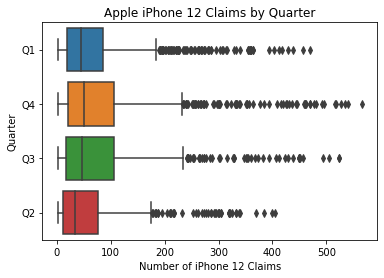

In [55]:
# Boxplot from seaborn
sns.boxplot(data=apple[apple["model_group"] == "iphone 12"], x="claim", y="quarter")

plt.xlabel("Number of iPhone 12 Claims") 
plt.ylabel("Quarter")  

plt.title("Apple iPhone 12 Claims by Quarter")

# This is a boxplot on all individual iPhone 12 claims data - the data is not yet aggregated

In [56]:
# Outliers for iphone 12 Q1
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 12") & (apple["quarter"] == "Q1")] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iphone 12 Q4
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 12") & (apple["quarter"] == "Q4")] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iphone 12 Q3
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 12") & (apple["quarter"] == "Q3")] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iphone 12 Q2
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 12") & (apple["quarter"] == "Q2")] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
3262,apple iphone 12 pro max,128gb,blue,470,2023-01-02,January,2023,winter,Q1,True,apple,iphone 12,4.713391
3264,apple iphone 12 pro max,128gb,gray,438,2023-01-02,January,2023,winter,Q1,True,apple,iphone 12,4.333603
3266,apple iphone 12 pro max,256gb,blue,359,2023-01-02,January,2023,winter,Q1,True,apple,iphone 12,3.396001
3421,apple iphone 12 pro max,128gb,blue,364,2023-01-09,January,2023,winter,Q1,False,apple,iphone 12,3.455343
3423,apple iphone 12 pro max,128gb,gray,355,2023-01-09,January,2023,winter,Q1,False,apple,iphone 12,3.348528
3424,apple iphone 12 pro max,256gb,blue,361,2023-01-09,January,2023,winter,Q1,False,apple,iphone 12,3.419738
3579,apple iphone 12 pro max,128gb,blue,457,2023-01-16,January,2023,winter,Q1,True,apple,iphone 12,4.559102
3581,apple iphone 12 pro max,128gb,gray,361,2023-01-16,January,2023,winter,Q1,True,apple,iphone 12,3.419738
3583,apple iphone 12 pro max,256gb,blue,329,2023-01-16,January,2023,winter,Q1,True,apple,iphone 12,3.039950
6936,apple iphone 12 pro max,128gb,blue,359,2022-03-07,March,2022,winter,Q1,False,apple,iphone 12,3.396001


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
165,apple iphone 12 pro max,128gb,blue,491,2022-11-14,November,2022,autumn,Q4,False,apple,iphone 12,4.058589
167,apple iphone 12 pro max,128gb,gray,535,2022-11-14,November,2022,autumn,Q4,False,apple,iphone 12,4.499716
169,apple iphone 12 pro max,256gb,blue,431,2022-11-14,November,2022,autumn,Q4,False,apple,iphone 12,3.457052
322,apple iphone 12 pro max,128gb,blue,425,2022-11-21,November,2022,autumn,Q4,True,apple,iphone 12,3.396898
324,apple iphone 12 pro max,128gb,gray,463,2022-11-21,November,2022,autumn,Q4,True,apple,iphone 12,3.777871
479,apple iphone 12 pro max,128gb,blue,566,2022-11-28,November,2022,autumn,Q4,False,apple,iphone 12,4.810510
481,apple iphone 12 pro max,128gb,gray,427,2022-11-28,November,2022,autumn,Q4,False,apple,iphone 12,3.416949
636,apple iphone 12 pro max,128gb,blue,469,2022-12-12,December,2022,autumn,Q4,False,apple,iphone 12,3.838025
638,apple iphone 12 pro max,128gb,gray,469,2022-12-12,December,2022,autumn,Q4,False,apple,iphone 12,3.838025
2214,apple iphone 12 pro max,128gb,blue,517,2022-10-10,October,2022,autumn,Q4,True,apple,iphone 12,4.319255


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
951,apple iphone 12 pro max,128gb,gray,504,2022-07-25,July,2022,summer,Q3,False,apple,iphone 12,4.896259
1106,apple iphone 12 pro max,128gb,gray,523,2022-08-01,August,2022,summer,Q3,False,apple,iphone 12,5.113655
1107,apple iphone 12 pro max,256gb,blue,352,2022-08-01,August,2022,summer,Q3,False,apple,iphone 12,3.157093
1262,apple iphone 12 pro max,128gb,gray,449,2022-08-08,August,2022,summer,Q3,False,apple,iphone 12,4.266956
1264,apple iphone 12 pro max,256gb,blue,406,2022-08-08,August,2022,summer,Q3,False,apple,iphone 12,3.774955
1421,apple iphone 12 pro max,128gb,blue,494,2022-08-15,August,2022,summer,Q3,False,apple,iphone 12,4.781840
1423,apple iphone 12 pro max,128gb,gray,394,2022-08-15,August,2022,summer,Q3,False,apple,iphone 12,3.637652
1425,apple iphone 12 pro max,256gb,blue,355,2022-08-15,August,2022,summer,Q3,False,apple,iphone 12,3.191419
1581,apple iphone 12 pro max,128gb,blue,450,2022-08-29,August,2022,summer,Q3,False,apple,iphone 12,4.278398
1583,apple iphone 12 pro max,128gb,gray,412,2022-08-29,August,2022,summer,Q3,False,apple,iphone 12,3.843606


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
7382,apple iphone 12 pro max,128gb,blue,305,2022-04-04,April,2022,spring,Q2,False,apple,iphone 12,3.309550
7384,apple iphone 12 pro max,128gb,gray,305,2022-04-04,April,2022,spring,Q2,False,apple,iphone 12,3.309550
7502,apple iphone 12 pro max,128gb,blue,322,2022-04-11,April,2022,spring,Q2,False,apple,iphone 12,3.539784
7626,apple iphone 12 pro max,128gb,blue,319,2022-04-18,April,2022,spring,Q2,False,apple,iphone 12,3.499154
7628,apple iphone 12 pro max,128gb,gray,300,2022-04-18,April,2022,spring,Q2,False,apple,iphone 12,3.241834
7764,apple iphone 12 pro max,128gb,blue,325,2022-04-25,April,2022,spring,Q2,False,apple,iphone 12,3.580413
7766,apple iphone 12 pro max,128gb,gray,286,2022-04-25,April,2022,spring,Q2,False,apple,iphone 12,3.052230
7892,apple iphone 12 pro max,128gb,blue,299,2022-05-02,May,2022,spring,Q2,False,apple,iphone 12,3.228291
7894,apple iphone 12 pro max,128gb,gray,295,2022-05-02,May,2022,spring,Q2,False,apple,iphone 12,3.174118
8023,apple iphone 12 pro max,128gb,blue,340,2022-05-09,May,2022,spring,Q2,False,apple,iphone 12,3.783561


#### EDA on iPhone 12 by Aggregating Claims Data for Each Weeks_Monday Sub-Section - Quarter

In [57]:
iphone_12 = apple[apple["model_group"] == "iphone 12"]

result_iphone_12 = iphone_12.groupby(['quarter', 'weeks_monday'], as_index = False).agg({'claim': np.sum})

print(result_iphone_12)

   quarter weeks_monday  claim
0       Q1   2022-01-03   2139
1       Q1   2022-01-10   1928
2       Q1   2022-01-17   1950
3       Q1   2022-01-24   2048
4       Q1   2022-01-31   1947
..     ...          ...    ...
81      Q4   2022-11-28   4334
82      Q4   2022-12-05   4058
83      Q4   2022-12-12   4231
84      Q4   2022-12-19   3299
85      Q4   2022-12-26   3959

[86 rows x 3 columns]


Text(0.5, 1.0, 'Apple iphone 12 Claims by Quarter')

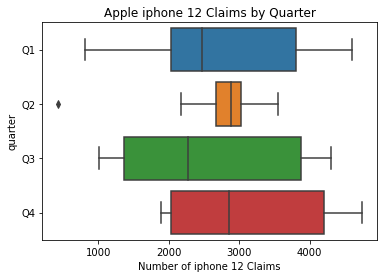

In [58]:
# Boxplot from seaborn
sns.boxplot(data=result_iphone_12, x="claim", y="quarter")

plt.xlabel("Number of iphone 12 Claims")
plt.ylabel("quarter")

plt.title("Apple iphone 12 Claims by Quarter")

# This is a more proper graphic - representing all iPhone 12 Claims data through weeks_monday aggregation

In [59]:
result_iphone_12_Q2 = result_iphone_12.copy()

Q2_iphone12 = result_iphone_12_Q2[result_iphone_12_Q2["quarter"] == "Q2"]

display(Q2_iphone12)

Q2_iphone12['z_score'] = stats.zscore(Q2_iphone12['claim'])
outliers_Q2_iphone12 = Q2_iphone12[(Q2_iphone12['z_score'] > 3) | (Q2_iphone12['z_score'] < -3)]
display(outliers_Q2_iphone12)

# Note: Outliers for boxplots are when they are outside of the 1.5 * IQR range, this doesn't necessarily match up to the z-score
# definition, so the z-score value cut-offs have been slightly adjusted so we can identify the data point that fell out of range
# for the boxplots

,quarter,weeks_monday,claim
20,Q2,2021-06-28,422
21,Q2,2022-04-04,2646
22,Q2,2022-04-11,2372
23,Q2,2022-04-18,2725
24,Q2,2022-04-25,2718
25,Q2,2022-05-02,2798
26,Q2,2022-05-09,2980
27,Q2,2022-05-16,2955
28,Q2,2022-05-23,3258
29,Q2,2022-05-30,3046


/tmp/ipykernel_19630/1337422843.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q2_iphone12['z_score'] = stats.zscore(Q2_iphone12['claim'])


,quarter,weeks_monday,claim,z_score
20,Q2,2021-06-28,422,-3.118209


In [60]:
iphone12_stats = result_iphone_12.groupby(['quarter']).agg({'claim': ['mean', 'min', 'max']})
print(iphone12_stats)

               claim            
                mean   min   max
quarter                         
Q1       2757.800000   807  4604
Q2       2724.000000   422  3553
Q3       2589.500000  1017  4303
Q4       3142.192308  1895  4741


### EDA on iPhone 13 - Quarter

Text(0.5, 1.0, 'Apple iPhone 13 Claims by Quarter')

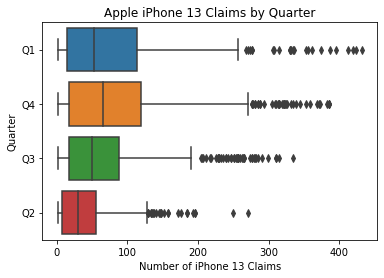

In [61]:
# Boxplot from seaborn
sns.boxplot(data=apple[apple["model_group"] == "iphone 13"], x="claim", y="quarter")

plt.xlabel("Number of iPhone 13 Claims") 
plt.ylabel("Quarter")  

plt.title("Apple iPhone 13 Claims by Quarter")
# This is a boxplot on all individual iPhone 13 claims data - the data is not yet aggregated

In [62]:
# Outliers for iphone 13 Q1
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 13") & (apple["quarter"] == "Q1")] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iphone 13 Q4
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 13") & (apple["quarter"] == "Q4")] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iphone 13 Q3
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 13") & (apple["quarter"] == "Q3")] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iphone 13 Q2
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 13") & (apple["quarter"] == "Q2")] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
3295,apple iphone 13 pro max,128gb,blue,420,2023-01-02,January,2023,winter,Q1,True,apple,iphone 13,3.619012
3300,apple iphone 13 pro max,256gb,blue,374,2023-01-02,January,2023,winter,Q1,True,apple,iphone 13,3.126696
3456,apple iphone 13 pro max,128gb,blue,396,2023-01-09,January,2023,winter,Q1,False,apple,iphone 13,3.362151
3613,apple iphone 13 pro max,128gb,blue,424,2023-01-16,January,2023,winter,Q1,True,apple,iphone 13,3.661823
10202,apple iphone 13 pro max,128gb,blue,432,2023-01-23,January,2023,winter,Q1,False,apple,iphone 13,3.747443
10523,apple iphone 13 pro max,128gb,blue,387,2023-02-06,February,2023,winter,Q1,False,apple,iphone 13,3.265829
10528,apple iphone 13 pro max,256gb,blue,413,2023-02-06,February,2023,winter,Q1,False,apple,iphone 13,3.544095


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
203,apple iphone 13 pro max,128gb,blue,385,2022-11-14,November,2022,autumn,Q4,False,apple,iphone 13,3.312737
205,apple iphone 13 pro max,128gb,graphite,359,2022-11-14,November,2022,autumn,Q4,False,apple,iphone 13,3.024288
208,apple iphone 13 pro max,256gb,blue,385,2022-11-14,November,2022,autumn,Q4,False,apple,iphone 13,3.312737
518,apple iphone 13 pro max,128gb,blue,372,2022-11-28,November,2022,autumn,Q4,False,apple,iphone 13,3.168512
672,apple iphone 13 pro max,128gb,graphite,368,2022-12-12,December,2022,autumn,Q4,False,apple,iphone 13,3.124135
675,apple iphone 13 pro max,256gb,blue,371,2022-12-12,December,2022,autumn,Q4,False,apple,iphone 13,3.157418
2710,apple iphone 13 pro max,256gb,blue,383,2022-11-07,November,2022,autumn,Q4,True,apple,iphone 13,3.290549
2861,apple iphone 13 pro max,256gb,blue,385,2022-12-05,December,2022,autumn,Q4,False,apple,iphone 13,3.312737


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
985,apple iphone 13 pro max,128gb,blue,311,2022-07-25,July,2022,summer,Q3,False,apple,iphone 13,3.415347
1140,apple iphone 13 pro max,128gb,blue,335,2022-08-01,August,2022,summer,Q3,False,apple,iphone 13,3.753624
1298,apple iphone 13 pro max,128gb,blue,311,2022-08-08,August,2022,summer,Q3,False,apple,iphone 13,3.415347
1937,apple iphone 13 pro max,128gb,blue,282,2022-09-19,September,2022,summer,Q3,False,apple,iphone 13,3.006595
2096,apple iphone 13 pro max,128gb,blue,315,2022-09-26,September,2022,autumn,Q3,False,apple,iphone 13,3.471727
9425,apple iphone 13 pro max,128gb,blue,291,2022-07-18,July,2022,summer,Q3,False,apple,iphone 13,3.133449
9585,apple iphone 13 pro max,128gb,blue,285,2022-08-22,August,2022,summer,Q3,False,apple,iphone 13,3.048880
9744,apple iphone 13 pro max,128gb,blue,299,2022-09-12,September,2022,summer,Q3,False,apple,iphone 13,3.246208


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
8492,apple iphone 13 pro max,128gb,blue,185,2022-05-30,May,2022,spring,Q2,True,apple,iphone 13,3.147981
8650,apple iphone 13 pro max,128gb,blue,193,2022-06-06,June,2022,spring,Q2,False,apple,iphone 13,3.325177
8811,apple iphone 13 pro max,256gb,blue,185,2022-06-13,June,2022,spring,Q2,False,apple,iphone 13,3.147981
8963,apple iphone 13 pro max,128gb,blue,250,2022-06-20,June,2022,spring,Q2,False,apple,iphone 13,4.587695
8965,apple iphone 13 pro max,128gb,graphite,196,2022-06-20,June,2022,spring,Q2,False,apple,iphone 13,3.391625
9114,apple iphone 13 pro max,128gb,blue,271,2022-06-27,June,2022,summer,Q2,False,apple,iphone 13,5.052833
9116,apple iphone 13 pro max,128gb,graphite,195,2022-06-27,June,2022,summer,Q2,False,apple,iphone 13,3.369476


#### EDA on iPhone 13 by Aggregating Claims Data for Each Weeks_Monday Sub-Section - Quarter

In [63]:
iphone_13 = apple[apple["model_group"] == "iphone 13"]

result_iphone_13 = iphone_13.groupby(['quarter', 'weeks_monday'], as_index = False).agg({'claim': np.sum})

print(result_iphone_13)

   quarter weeks_monday  claim
0       Q1   2022-01-03      7
1       Q1   2022-01-10     13
2       Q1   2022-01-17     10
3       Q1   2022-01-24     11
4       Q1   2022-01-31     25
..     ...          ...    ...
61      Q4   2022-11-28   3528
62      Q4   2022-12-05   3291
63      Q4   2022-12-12   3123
64      Q4   2022-12-19   2312
65      Q4   2022-12-26   2616

[66 rows x 3 columns]


Text(0.5, 1.0, 'Apple iPhone 13 Claims by Quarter')

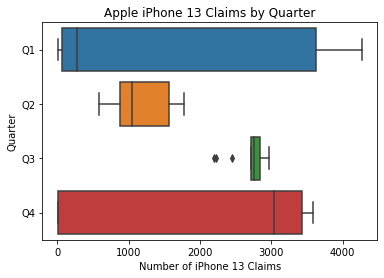

In [64]:
# Boxplot from seaborn
sns.boxplot(data=result_iphone_13, x="claim", y="quarter")

plt.xlabel("Number of iPhone 13 Claims")
plt.ylabel("Quarter")

plt.title("Apple iPhone 13 Claims by Quarter")

# This is a more proper graphic - representing all iPhone 13 Claims data through weeks_monday aggregation

In [65]:
result_iphone_13_Q3 = result_iphone_13.copy()

Q3_iphone13 = result_iphone_13_Q3[result_iphone_13_Q3["quarter"] == "Q3"]

display(Q3_iphone13)

Q3_iphone13['z_score'] = stats.zscore(Q3_iphone13['claim'])
outliers_Q3_iphone13 = Q3_iphone13[(Q3_iphone13['z_score'] > 3) | (Q3_iphone13['z_score'] < -1)]
display(outliers_Q3_iphone13)

# Note: Outliers for boxplots are when they are outside of the 1.5 * IQR range, this doesn't necessarily match up to the z-score
# definition, so the z-score value cut-offs have been slightly adjusted so we can identify the data point that fell out of range
# for the boxplots

,quarter,weeks_monday,claim
33,Q3,2022-07-04,2197
34,Q3,2022-07-11,2228
35,Q3,2022-07-18,2446
36,Q3,2022-07-25,2724
37,Q3,2022-08-01,2791
38,Q3,2022-08-08,2840
39,Q3,2022-08-15,2771
40,Q3,2022-08-22,2745
41,Q3,2022-08-29,2835
42,Q3,2022-09-05,2761


/tmp/ipykernel_19630/877002404.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q3_iphone13['z_score'] = stats.zscore(Q3_iphone13['claim'])


,quarter,weeks_monday,claim,z_score
33,Q3,2022-07-04,2197,-2.105805
34,Q3,2022-07-11,2228,-1.971802
35,Q3,2022-07-18,2446,-1.029460


In [66]:
iphone13_stats = result_iphone_13.groupby(['quarter']).agg({'claim': ['mean', 'min', 'max']})
print(iphone13_stats)

               claim            
                mean   min   max
quarter                         
Q1       1297.400000     7  4270
Q2       1164.230769   579  1776
Q3       2684.153846  2197  2973
Q4       2086.550000     2  3585


### EDA on iPhone 14 - Quarter

Text(0.5, 1.0, 'Apple iPhone 14 Claims by Quarter')

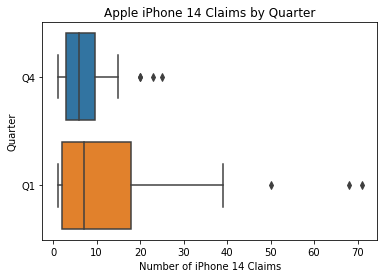

In [67]:
# Boxplot from seaborn
sns.boxplot(data=apple[apple["model_group"] == "iphone 14"], x="claim", y="quarter")

plt.xlabel("Number of iPhone 14 Claims") 
plt.ylabel("Quarter")  

plt.title("Apple iPhone 14 Claims by Quarter")

# This is a boxplot on all individual iPhone 14 claims data - the data is not yet aggregated

In [68]:
# Outliers for iphone 14 Q4
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 14") & (apple["quarter"] == "Q4")] ['claim'])
outliers = data[(data['z_score'] > 1.5) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iphone 14 Q1
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 14") & (apple["quarter"] == "Q1")] ['claim'])
outliers = data[(data['z_score'] > 1.4) | (data['z_score'] < -3)]
display(outliers)

,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
684,apple iphone 14,128gb,black,20,2022-12-12,December,2022,autumn,Q4,False,apple,iphone 14,1.777518
2871,apple iphone 14,128gb,black,25,2022-12-05,December,2022,autumn,Q4,False,apple,iphone 14,2.520443
3014,apple iphone 14,128gb,black,20,2022-12-19,December,2022,autumn,Q4,False,apple,iphone 14,1.777518
3153,apple iphone 14,128gb,black,23,2022-12-26,December,2022,winter,Q4,True,apple,iphone 14,2.223273


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
10541,apple iphone 14 pro max,128gb,black,71,2023-02-06,February,2023,winter,Q1,False,apple,iphone 14,3.204676
10542,apple iphone 14 pro max,128gb,gold,50,2023-02-06,February,2023,winter,Q1,False,apple,iphone 14,2.015867
10543,apple iphone 14 pro max,128gb,purple,68,2023-02-06,February,2023,winter,Q1,False,apple,iphone 14,3.034846


#### EDA on iPhone 14 by Aggregating Claims Data for Each Weeks_Monday Sub-Section - Quarter

In [69]:
iphone_14 = apple[apple["model_group"] == "iphone 14"]

result_iphone_14 = iphone_14.groupby(['quarter', 'weeks_monday'], as_index = False).agg({'claim': np.sum})

print(result_iphone_14)

   quarter weeks_monday  claim
0       Q1   2023-01-02     45
1       Q1   2023-01-09     59
2       Q1   2023-01-16     60
3       Q1   2023-01-23     57
4       Q1   2023-01-30     54
5       Q1   2023-02-06    251
6       Q1   2023-02-13     64
7       Q4   2022-11-14      9
8       Q4   2022-11-21     30
9       Q4   2022-11-28     23
10      Q4   2022-12-05     43
11      Q4   2022-12-12     32
12      Q4   2022-12-19     36
13      Q4   2022-12-26     44


Text(0.5, 1.0, 'Apple iPhone 14 Claims by Quarter')

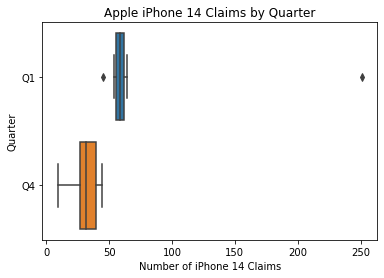

In [70]:
# Boxplot from seaborn
sns.boxplot(data=result_iphone_14, x="claim", y="quarter")

plt.xlabel("Number of iPhone 14 Claims")
plt.ylabel("Quarter")

plt.title("Apple iPhone 14 Claims by Quarter")

# This is a more proper graphic - representing all iPhone 14 Claims data through weeks_monday aggregation

In [71]:
result_iphone_14_Q1 = result_iphone_14.copy()

Q1_iphone14 = result_iphone_14_Q1[result_iphone_14_Q1["quarter"] == "Q1"]

display(Q1_iphone14)

Q1_iphone14['z_score'] = stats.zscore(Q1_iphone14['claim'])
outliers_Q1_iphone14 = Q1_iphone14[(Q1_iphone14['z_score'] > 2) | (Q1_iphone14['z_score'] < -0.5)]
display(outliers_Q1_iphone14)

# Note: Outliers for boxplots are when they are outside of the 1.5 * IQR range, this doesn't necessarily match up to the z-score
# definition, so the z-score value cut-offs have been slightly adjusted so we can identify the data point that fell out of range
# for the boxplots

,quarter,weeks_monday,claim
0,Q1,2023-01-02,45
1,Q1,2023-01-09,59
2,Q1,2023-01-16,60
3,Q1,2023-01-23,57
4,Q1,2023-01-30,54
5,Q1,2023-02-06,251
6,Q1,2023-02-13,64


/tmp/ipykernel_19630/2339107566.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q1_iphone14['z_score'] = stats.zscore(Q1_iphone14['claim'])


,quarter,weeks_monday,claim,z_score
0,Q1,2023-01-02,45,-0.575324
5,Q1,2023-02-06,251,2.441465


## EDA on Model and Holidays Section

### EDA on Holiday Row Count by Model

Count
model_group Holidays_Boolean       
iphone 11   False              2392
            True                635
iphone 12   False              2559
            True                660
iphone 13   False              1345
            True                316
iphone 14   False                48
            True                 20
iphone x    False              2162
            True                584

Total number of rows in the apple holidays table above is 10721


,,Count
model_group,Holidays_Boolean,
iphone 12,False,2559
iphone 11,False,2392
iphone x,False,2162
iphone 13,False,1345
iphone 12,True,660
iphone 11,True,635
iphone x,True,584
iphone 13,True,316
iphone 14,False,48


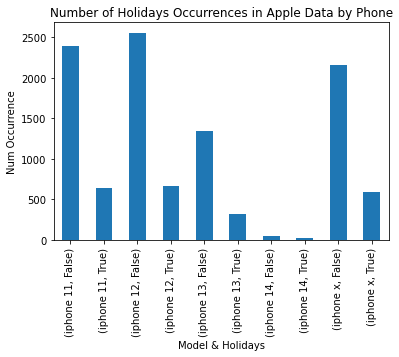

In [72]:
apple_holidays = apple.groupby(['model_group', 'Holidays_Boolean'])

apple_holidays_count = apple_holidays.agg(Count =('season', 'count'))

display(apple_holidays_count)
print("Total number of rows in the apple holidays table above is", sum(apple_holidays_count["Count"]))


apple_graphic1 = apple_holidays_count.plot(y="Count", kind="bar", title = "Number of Holidays Occurrences in Apple Data by Phone", rot=90)
apple_graphic1.set(xlabel="Model & Holidays", ylabel="Num Occurrence")
# Remove the legend that is auto-generated
apple_graphic1.legend('', frameon=False)

apple_holidays_count.groupby(['model_group', 'Holidays_Boolean']).max().sort_values(by = 'Count', ascending = False)

# The table shows the number of entries we have per holidays based on iphone model

### EDA on Total Claims by Model and Holidays

                              Sum_Claim
model_group Holidays_Boolean           
iphone 11   False                180720
            True                  48112
iphone 12   False                190525
            True                  51791
iphone 13   False                 91066
            True                  26642
iphone 14   False                   628
            True                    179
iphone x    False                102037
            True                  28154


,,Sum_Claim
model_group,Holidays_Boolean,
iphone 12,False,190525
iphone 11,False,180720
iphone x,False,102037
iphone 13,False,91066
iphone 12,True,51791
iphone 11,True,48112
iphone x,True,28154
iphone 13,True,26642
iphone 14,False,628


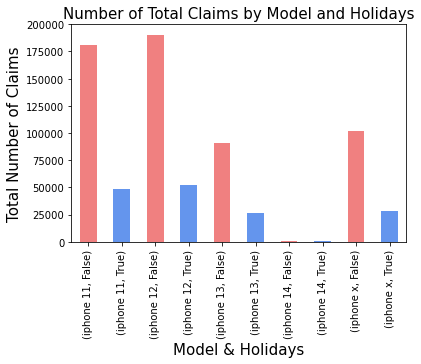

In [73]:
total_claims_holidays_model = apple.groupby(['model_group', 'Holidays_Boolean'])

total_claims_holidays_model_count = total_claims_holidays_model.agg(Sum_Claim =('claim', np.sum))

print(total_claims_holidays_model_count)

# Showing the exact claim numbers by holidays
total_claims_holidays_model_count.plot.bar(y="Sum_Claim", color = ['lightcoral', 'cornflowerblue'], rot=90)
plt.xlabel("Model & Holidays",  size = 15)
plt.ylabel("Total Number of Claims", size = 15)
plt.title("Number of Total Claims by Model and Holidays", size = 15)
# Remove the legend that is auto-generated
plt.legend('', frameon=False)

total_claims_holidays_model_count.groupby(['model_group', 'Holidays_Boolean']).max().sort_values(by = 'Sum_Claim', ascending = False)

# Total number of claims for each model_group by holidays


### Table on Claims Data by Individual Row - Holidays

In [74]:
# Mean, min, max of each model and holidays for their claims - each claim data point is not aggreagated
result = apple.groupby(['model_group', 'Holidays_Boolean']).agg({'claim': ['mean', 'min', 'max']})
print(result)

                                  claim         
                                   mean min  max
model_group Holidays_Boolean                    
iphone 11   False             75.551839   1  442
            True              75.766929   1  450
iphone 12   False             74.452911   1  566
            True              78.471212   1  541
iphone 13   False             67.707063   1  432
            True              84.310127   1  424
iphone 14   False             13.083333   1   71
            True               8.950000   1   35
iphone x    False             47.195652   1  350
            True              48.208904   1  353


### EDA on iPhone SE - Holidays

Text(0.5, 1.0, 'Apple iPhone SE Claims by Holidays')

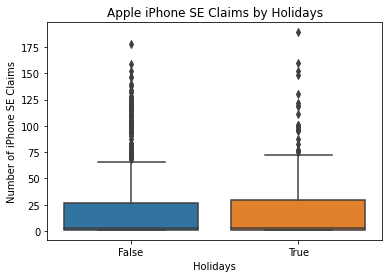

In [60]:
# Boxplot from seaborn
sns.boxplot(data=apple[apple["model_group"] == "iphone se"], x="Holidays_Boolean", y="claim")


plt.xlabel("Holidays")  
plt.ylabel("Number of iPhone SE Claims")

plt.title("Apple iPhone SE Claims by Holidays")

# This is a boxplot on all individual iPhone SE claims data - the data is not yet aggregated

In [61]:
# Outliers for iPhone X Holiday False
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone se") & (apple["Holidays_Boolean"] == False)] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iPhone X Holiday True
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone se") & (apple["Holidays_Boolean"] == True)] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
1061,apple iphone se 2020,64gb,black,146,2022-07-25,July,2022,summer,Q3,False,apple,iphone se,3.689190
1233,apple iphone se 2020,64gb,black,125,2022-08-01,August,2022,summer,Q3,False,apple,iphone se,3.069845
1405,apple iphone se 2020,64gb,black,178,2022-08-08,August,2022,summer,Q3,False,apple,iphone se,4.632955
2104,apple iphone se 2020,64gb,black,128,2022-09-19,September,2022,summer,Q3,False,apple,iphone se,3.158323
2623,apple iphone se 2020,64gb,black,134,2022-10-17,October,2022,autumn,Q4,False,apple,iphone se,3.335279
2802,apple iphone se 2020,64gb,black,140,2022-10-31,October,2022,autumn,Q4,False,apple,iphone se,3.512235
3755,apple iphone se 2020,64gb,black,123,2023-01-09,January,2023,winter,Q1,False,apple,iphone se,3.010860
4377,apple iphone se 2020,64gb,black,124,2021-07-26,July,2021,summer,Q3,False,apple,iphone se,3.040353
4575,apple iphone se 2020,64gb,black,138,2021-08-09,August,2021,summer,Q3,False,apple,iphone se,3.453249
4676,apple iphone se 2020,64gb,black,146,2021-08-16,August,2021,summer,Q3,False,apple,iphone se,3.689190


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
891,apple iphone se 2020,64gb,black,152,2022-07-04,July,2022,summer,Q3,True,apple,iphone se,3.577702
2447,apple iphone se 2020,64gb,black,160,2022-10-10,October,2022,autumn,Q4,True,apple,iphone se,3.797192
2969,apple iphone se 2020,64gb,black,189,2022-11-07,November,2022,autumn,Q4,True,apple,iphone se,4.592847
3922,apple iphone se 2020,64gb,black,148,2023-01-16,January,2023,winter,Q1,True,apple,iphone se,3.467956


#### EDA on iPhone SE by Aggregating Claims Data for Each Weeks_Monday Sub-Section - Holidays

In [62]:
iphone_se = apple[apple["model_group"] == "iphone se"]

result_iphone_se = iphone_se.groupby(['Holidays_Boolean', 'weeks_monday'], as_index = False).agg({'claim': np.sum})

print(result_iphone_se)

    Holidays_Boolean weeks_monday  claim
0              False   2021-06-28     55
1              False   2021-07-12    140
2              False   2021-07-19    199
3              False   2021-07-26    222
4              False   2021-08-02    234
..               ...          ...    ...
81              True   2022-11-07    419
82              True   2022-11-21     67
83              True   2022-12-26     46
84              True   2023-01-02     50
85              True   2023-01-16    315

[86 rows x 3 columns]


Text(0.5, 1.0, 'Apple iPhone SE Claims by Holidays')

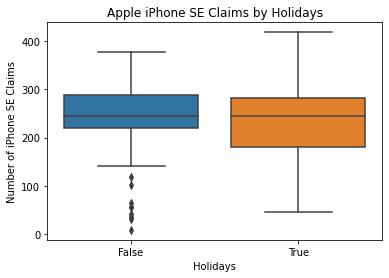

In [64]:
# Boxplot from seaborn
sns.boxplot(data=result_iphone_se, x = "Holidays_Boolean", y="claim")

plt.xlabel("Holidays")
plt.ylabel("Number of iPhone SE Claims") 

plt.title("Apple iPhone SE Claims by Holidays")

# This is a more proper graphic - representing all iPhone SE Claims data through weeks_monday aggregation

In [78]:
result_iphone_se_holidays_true = result_iphone_se.copy()

holidays_true_iphone_se = result_iphone_se_holidays_true[result_iphone_se_holidays_true["Holidays_Boolean"] == True]

display(holidays_true_iphone_se)

holidays_true_iphone_se['z_score'] = stats.zscore(holidays_true_iphone_se['claim'])
outliers_holidays_true_iphone_se = holidays_true_iphone_se[(holidays_true_iphone_se['z_score'] > 3) | (holidays_true_iphone_se['z_score'] < -0.15)]
display(outliers_holidays_true_iphone_se)

# Note: Outliers for boxplots are when they are outside of the 1.5 * IQR range, this doesn't necessarily match up to the z-score
# definition, so the z-score value cut-offs have been slightly adjusted so we can identify the data point that fell out of range
# for the boxplots

,Holidays_Boolean,weeks_monday,claim
68,True,2021-07-05,171
69,True,2021-09-06,163
70,True,2021-10-11,218
71,True,2021-11-08,284
72,True,2021-11-22,251
73,True,2021-12-20,279
74,True,2021-12-27,268
75,True,2022-01-17,240
76,True,2022-02-21,207
77,True,2022-05-30,230


/tmp/ipykernel_20853/1743909526.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holidays_true_iphone_se['z_score'] = stats.zscore(holidays_true_iphone_se['claim'])


,Holidays_Boolean,weeks_monday,claim,z_score
68,True,2021-07-05,171,-0.609601
69,True,2021-09-06,163,-0.687011
70,True,2021-10-11,218,-0.154819
76,True,2022-02-21,207,-0.261258
82,True,2022-11-21,67,-1.615927
83,True,2022-12-26,46,-1.819128
84,True,2023-01-02,50,-1.780423


### EDA on iPhone X - Holidays

Text(0.5, 1.0, 'Apple iPhone X Claims by Holidays')

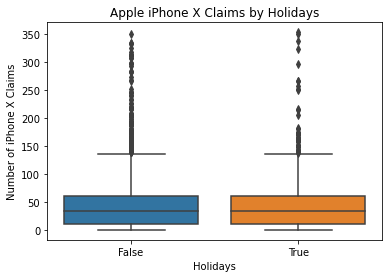

In [75]:
# Boxplot from seaborn
sns.boxplot(data=apple[apple["model_group"] == "iphone x"], x="Holidays_Boolean", y="claim")


plt.xlabel("Holidays")  
plt.ylabel("Number of iPhone X Claims")

plt.title("Apple iPhone X Claims by Holidays")

# This is a boxplot on all individual iPhone X claims data - the data is not yet aggregated

In [76]:
# Outliers for iPhone X Holiday False
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone x") & (apple["Holidays_Boolean"] == False)] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iPhone X Holiday True
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone x") & (apple["Holidays_Boolean"] == True)] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
74,apple iphone xr,64gb,black,273,2022-01-24,January,2022,winter,Q1,False,apple,iphone x,4.548253
1167,apple iphone xr,64gb,black,216,2022-08-01,August,2022,summer,Q3,False,apple,iphone x,3.400133
1326,apple iphone xr,64gb,black,206,2022-08-08,August,2022,summer,Q3,False,apple,iphone x,3.198709
3897,apple iphone xr,64gb,black,299,2021-07-12,July,2021,summer,Q3,False,apple,iphone x,5.071957
3907,apple iphone xs,64gb,gray,227,2021-07-12,July,2021,summer,Q3,False,apple,iphone x,3.621700
3977,apple iphone xr,64gb,black,313,2021-07-19,July,2021,summer,Q3,False,apple,iphone x,5.353951
3987,apple iphone xs,64gb,gray,232,2021-07-19,July,2021,summer,Q3,False,apple,iphone x,3.722412
4057,apple iphone xr,64gb,black,282,2021-07-26,July,2021,summer,Q3,False,apple,iphone x,4.729535
4067,apple iphone xs,64gb,gray,220,2021-07-26,July,2021,summer,Q3,False,apple,iphone x,3.480703
4144,apple iphone xr,64gb,black,307,2021-08-02,August,2021,summer,Q3,False,apple,iphone x,5.233096


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
2276,apple iphone xr,64gb,black,215,2022-10-10,October,2022,autumn,Q4,True,apple,iphone x,3.188285
3815,apple iphone xr,64gb,black,350,2021-07-05,July,2021,summer,Q3,True,apple,iphone x,5.768869
3825,apple iphone xs,64gb,gray,266,2021-07-05,July,2021,summer,Q3,True,apple,iphone x,4.163172
3827,apple iphone xs max,256gb,gold,216,2021-07-05,July,2021,summer,Q3,True,apple,iphone x,3.207400
4594,apple iphone xr,64gb,black,250,2021-09-06,September,2021,summer,Q3,True,apple,iphone x,3.857325
5032,apple iphone xr,64gb,black,338,2021-10-11,October,2021,autumn,Q4,True,apple,iphone x,5.539484
5391,apple iphone xr,64gb,black,353,2021-11-08,November,2021,autumn,Q4,True,apple,iphone x,5.826216
5579,apple iphone xr,64gb,black,252,2021-11-22,November,2021,autumn,Q4,True,apple,iphone x,3.895556
5979,apple iphone xr,64gb,black,297,2021-12-20,December,2021,autumn,Q4,True,apple,iphone x,4.755751
6077,apple iphone xr,64gb,black,324,2021-12-27,December,2021,winter,Q4,True,apple,iphone x,5.271868


#### EDA on iPhone X by Aggregating Claims Data for Each Weeks_Monday Sub-Section - Holidays

In [77]:
iphone_10 = apple[apple["model_group"] == "iphone x"]

result_iphone_10 = iphone_10.groupby(['Holidays_Boolean', 'weeks_monday'], as_index = False).agg({'claim': np.sum})

print(result_iphone_10)

    Holidays_Boolean weeks_monday  claim
0              False   2021-06-28   1297
1              False   2021-07-12   3004
2              False   2021-07-19   2866
3              False   2021-07-26   2800
4              False   2021-08-02   2748
..               ...          ...    ...
81              True   2022-11-07   1248
82              True   2022-11-21    982
83              True   2022-12-26    900
84              True   2023-01-02    938
85              True   2023-01-16    853

[86 rows x 3 columns]


Text(0.5, 1.0, 'Apple iPhone X Claims by Holidays')

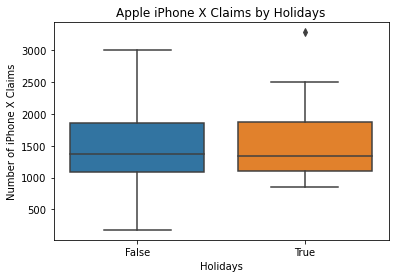

In [78]:
# Boxplot from seaborn
sns.boxplot(data=result_iphone_10, x = "Holidays_Boolean", y="claim")

plt.xlabel("Holidays")
plt.ylabel("Number of iPhone X Claims") 

plt.title("Apple iPhone X Claims by Holidays")

# This is a more proper graphic - representing all iPhone X Claims data through weeks_monday aggregation

In [79]:
result_iphone_x_holidays_true = result_iphone_10.copy()

holidays_true_iphone_x = result_iphone_x_holidays_true[result_iphone_x_holidays_true["Holidays_Boolean"] == True]

display(holidays_true_iphone_x)

holidays_true_iphone_x['z_score'] = stats.zscore(holidays_true_iphone_x['claim'])
outliers_holidays_true_iphone_x = holidays_true_iphone_x[(holidays_true_iphone_x['z_score'] > 2.5) | (holidays_true_iphone_x['z_score'] < -3)]
display(outliers_holidays_true_iphone_x)

# Note: Outliers for boxplots are when they are outside of the 1.5 * IQR range, this doesn't necessarily match up to the z-score
# definition, so the z-score value cut-offs have been slightly adjusted so we can identify the data point that fell out of range
# for the boxplots

,Holidays_Boolean,weeks_monday,claim
68,True,2021-07-05,3280
69,True,2021-09-06,1859
70,True,2021-10-11,2504
71,True,2021-11-08,2229
72,True,2021-11-22,1761
73,True,2021-12-20,1917
74,True,2021-12-27,1882
75,True,2022-01-17,1704
76,True,2022-02-21,1270
77,True,2022-05-30,1152


/tmp/ipykernel_19630/658741900.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holidays_true_iphone_x['z_score'] = stats.zscore(holidays_true_iphone_x['claim'])


,Holidays_Boolean,weeks_monday,claim,z_score
68,True,2021-07-05,3280,2.73711


In [80]:
iphoneX_stats = result_iphone_10.groupby(['Holidays_Boolean']).agg({'claim': ['mean', 'min', 'max']})
print(iphoneX_stats)

                        claim           
                         mean  min   max
Holidays_Boolean                        
False             1500.544118  179  3004
True              1564.111111  853  3280


### EDA on iPhone 11 - Holidays

Text(0.5, 1.0, 'Apple iPhone 11 Claims by Holidays')

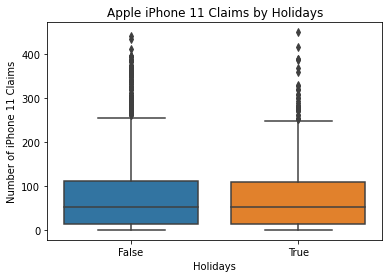

In [81]:
# Boxplot from seaborn
sns.boxplot(data=apple[apple["model_group"] == "iphone 11"], x="Holidays_Boolean", y="claim")

plt.xlabel("Holidays")  
plt.ylabel("Number of iPhone 11 Claims")

plt.title("Apple iPhone 11 Claims by Holidays")

# This is a boxplot on all individual iphone 11 claims data - the data is not yet aggregated

In [82]:
# Outliers for iPhone 11 Holiday False
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 11") & (apple["Holidays_Boolean"] == False)] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iPhone 11 Holiday True
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 11") & (apple["Holidays_Boolean"] == True)] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
105,apple iphone 11,64gb,black,383,2022-11-14,November,2022,autumn,Q4,False,apple,iphone 11,3.898016
419,apple iphone 11,64gb,black,351,2022-11-28,November,2022,autumn,Q4,False,apple,iphone 11,3.492301
583,apple iphone 11,64gb,black,385,2022-12-12,December,2022,autumn,Q4,False,apple,iphone 11,3.923373
890,apple iphone 11,64gb,black,388,2022-07-25,July,2022,summer,Q3,False,apple,iphone 11,3.961409
1045,apple iphone 11,64gb,black,370,2022-08-01,August,2022,summer,Q3,False,apple,iphone 11,3.733194
1198,apple iphone 11,64gb,black,344,2022-08-08,August,2022,summer,Q3,False,apple,iphone 11,3.403550
1358,apple iphone 11,64gb,black,355,2022-08-15,August,2022,summer,Q3,False,apple,iphone 11,3.543015
1520,apple iphone 11,64gb,black,375,2022-08-29,August,2022,summer,Q3,False,apple,iphone 11,3.796587
1838,apple iphone 11,64gb,black,327,2022-09-19,September,2022,summer,Q3,False,apple,iphone 11,3.188014
2308,apple iphone 11,64gb,black,389,2022-10-17,October,2022,autumn,Q4,False,apple,iphone 11,3.974088


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
263,apple iphone 11,64gb,black,327,2022-11-21,November,2022,autumn,Q4,True,apple,iphone 11,3.181267
734,apple iphone 11,64gb,black,322,2022-07-04,July,2022,summer,Q3,True,apple,iphone 11,3.117954
2157,apple iphone 11,64gb,black,450,2022-10-10,October,2022,autumn,Q4,True,apple,iphone 11,4.738768
2615,apple iphone 11,64gb,black,389,2022-11-07,November,2022,autumn,Q4,True,apple,iphone 11,3.966349
3752,apple iphone 11,128gb,black,319,2021-07-05,July,2021,summer,Q3,True,apple,iphone 11,3.079966
3764,apple iphone 11,64gb,black,417,2021-07-05,July,2021,summer,Q3,True,apple,iphone 11,4.320902
4975,apple iphone 11,64gb,black,387,2021-10-11,October,2021,autumn,Q4,True,apple,iphone 11,3.941023
5331,apple iphone 11,64gb,black,360,2021-11-08,November,2021,autumn,Q4,True,apple,iphone 11,3.599133
5515,apple iphone 11,64gb,black,369,2021-11-22,November,2021,autumn,Q4,True,apple,iphone 11,3.713096
5909,apple iphone 11,64gb,black,390,2021-12-20,December,2021,autumn,Q4,True,apple,iphone 11,3.979011


#### EDA on iPhone 11 by Aggregating Claims Data for Each Weeks_Monday Sub-Section - Holidays

In [83]:
iphone_11 = apple[apple["model_group"] == "iphone 11"]

result_iphone_11 = iphone_11.groupby(['Holidays_Boolean', 'weeks_monday'], as_index = False).agg({'claim': np.sum})

print(result_iphone_11)

    Holidays_Boolean weeks_monday  claim
0              False   2021-06-28   1499
1              False   2021-07-12   3753
2              False   2021-07-19   3664
3              False   2021-07-26   3583
4              False   2021-08-02   3661
..               ...          ...    ...
81              True   2022-11-07   2620
82              True   2022-11-21   2169
83              True   2022-12-26   1985
84              True   2023-01-02   2003
85              True   2023-01-16   1856

[86 rows x 3 columns]


Text(0.5, 1.0, 'Apple iPhone 11 Claims by Holidays')

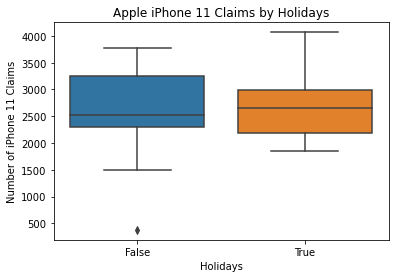

In [84]:
# Boxplot from seaborn
sns.boxplot(data=result_iphone_11, x = "Holidays_Boolean", y="claim")

plt.xlabel("Holidays")
plt.ylabel("Number of iPhone 11 Claims") 

plt.title("Apple iPhone 11 Claims by Holidays")

# This is a more proper graphic - representing all iphone 11 Claims data through weeks_monday aggregation

In [85]:
result_iphone_11_holidays_false = result_iphone_11.copy()

holidays_false_iphone_11 = result_iphone_11_holidays_false[result_iphone_11_holidays_false["Holidays_Boolean"] == False]

display(holidays_false_iphone_11)

holidays_false_iphone_11['z_score'] = stats.zscore(holidays_false_iphone_11['claim'])
outliers_holidays_false_iphone_11 = holidays_false_iphone_11[(holidays_false_iphone_11['z_score'] > 3) | (holidays_false_iphone_11['z_score'] < -3)]
display(outliers_holidays_false_iphone_11)

# Note: Outliers for boxplots are when they are outside of the 1.5 * IQR range, this doesn't necessarily match up to the z-score
# definition, so the z-score value cut-offs have been slightly adjusted so we can identify the data point that fell out of range
# for the boxplots

,Holidays_Boolean,weeks_monday,claim
0,False,2021-06-28,1499
1,False,2021-07-12,3753
2,False,2021-07-19,3664
3,False,2021-07-26,3583
4,False,2021-08-02,3661
...,...,...,...
63,False,2023-01-09,1863
64,False,2023-01-23,1751
65,False,2023-01-30,1536
66,False,2023-02-06,2157


/tmp/ipykernel_19630/250749253.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holidays_false_iphone_11['z_score'] = stats.zscore(holidays_false_iphone_11['claim'])


,Holidays_Boolean,weeks_monday,claim,z_score
67,False,2023-02-13,378,-3.582387


In [86]:
iphone11_stats = result_iphone_11.groupby(['Holidays_Boolean']).agg({'claim': ['mean', 'min', 'max']})
print(iphone11_stats)

                        claim            
                         mean   min   max
Holidays_Boolean                         
False             2657.647059   378  3768
True              2672.888889  1856  4068


### EDA on iPhone 12 - Holidays

Text(0.5, 1.0, 'Apple iPhone 12 Claims by Holidays')

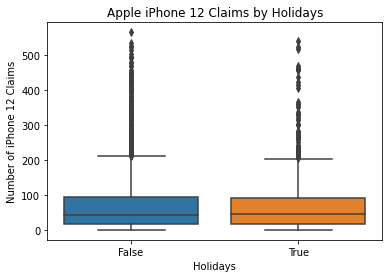

In [87]:
# Boxplot from seaborn
sns.boxplot(data=apple[apple["model_group"] == "iphone 12"], x="Holidays_Boolean", y="claim")

plt.xlabel("Holidays")  
plt.ylabel("Number of iPhone 12 Claims")

plt.title("Apple iPhone 12 Claims by Holidays")

# This is a boxplot on all individual iphone 12 claims data - the data is not yet aggregated

In [88]:
# Outliers for iPhone 12 Holiday False
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 12") & (apple["Holidays_Boolean"] == False)] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iPhone 12 Holiday True
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 12") & (apple["Holidays_Boolean"] == True)] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
165,apple iphone 12 pro max,128gb,blue,491,2022-11-14,November,2022,autumn,Q4,False,apple,iphone 12,4.749515
167,apple iphone 12 pro max,128gb,gray,535,2022-11-14,November,2022,autumn,Q4,False,apple,iphone 12,5.251207
169,apple iphone 12 pro max,256gb,blue,431,2022-11-14,November,2022,autumn,Q4,False,apple,iphone 12,4.065388
479,apple iphone 12 pro max,128gb,blue,566,2022-11-28,November,2022,autumn,Q4,False,apple,iphone 12,5.604673
481,apple iphone 12 pro max,128gb,gray,427,2022-11-28,November,2022,autumn,Q4,False,apple,iphone 12,4.019780
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,apple iphone 12 pro max,128gb,blue,417,2023-01-30,January,2023,winter,Q1,False,apple,iphone 12,3.905759
10323,apple iphone 12 pro max,128gb,gray,361,2023-01-30,January,2023,winter,Q1,False,apple,iphone 12,3.267241
10325,apple iphone 12 pro max,256gb,blue,340,2023-01-30,January,2023,winter,Q1,False,apple,iphone 12,3.027796
10482,apple iphone 12 pro max,128gb,blue,428,2023-02-06,February,2023,winter,Q1,False,apple,iphone 12,4.031182


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
322,apple iphone 12 pro max,128gb,blue,425,2022-11-21,November,2022,autumn,Q4,True,apple,iphone 12,3.776891
324,apple iphone 12 pro max,128gb,gray,463,2022-11-21,November,2022,autumn,Q4,True,apple,iphone 12,4.191061
1739,apple iphone 12 pro max,128gb,blue,524,2022-09-05,September,2022,summer,Q3,True,apple,iphone 12,4.855913
1741,apple iphone 12 pro max,128gb,gray,367,2022-09-05,September,2022,summer,Q3,True,apple,iphone 12,3.144737
2214,apple iphone 12 pro max,128gb,blue,517,2022-10-10,October,2022,autumn,Q4,True,apple,iphone 12,4.779619
2216,apple iphone 12 pro max,128gb,gray,459,2022-10-10,October,2022,autumn,Q4,True,apple,iphone 12,4.147464
2670,apple iphone 12 pro max,128gb,blue,541,2022-11-07,November,2022,autumn,Q4,True,apple,iphone 12,5.041200
2672,apple iphone 12 pro max,128gb,gray,460,2022-11-07,November,2022,autumn,Q4,True,apple,iphone 12,4.158363
2674,apple iphone 12 pro max,256gb,blue,408,2022-11-07,November,2022,autumn,Q4,True,apple,iphone 12,3.591604
3117,apple iphone 12 pro max,128gb,blue,415,2022-12-26,December,2022,winter,Q4,True,apple,iphone 12,3.667899


#### EDA on iPhone 12 by Aggregating Claims Data for Each Weeks_Monday Sub-Section - Holidays

In [89]:
iphone_12 = apple[apple["model_group"] == "iphone 12"]

result_iphone_12 = iphone_12.groupby(['Holidays_Boolean', 'weeks_monday'], as_index = False).agg({'claim': np.sum})

print(result_iphone_12)

    Holidays_Boolean weeks_monday  claim
0              False   2021-06-28    422
1              False   2021-07-12   1045
2              False   2021-07-19   1144
3              False   2021-07-26   1157
4              False   2021-08-02   1212
..               ...          ...    ...
81              True   2022-11-07   4500
82              True   2022-11-21   4086
83              True   2022-12-26   3959
84              True   2023-01-02   4189
85              True   2023-01-16   4277

[86 rows x 3 columns]


Text(0.5, 1.0, 'Apple iPhone 12 Claims by Holidays')

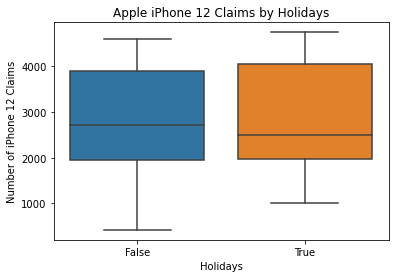

In [90]:
# Boxplot from seaborn
sns.boxplot(data=result_iphone_12, x = "Holidays_Boolean", y="claim")

plt.xlabel("Holidays")
plt.ylabel("Number of iPhone 12 Claims") 

plt.title("Apple iPhone 12 Claims by Holidays")

# This is a more proper graphic - representing all iphone 12 Claims data through weeks_monday aggregation

In [91]:
iphone12_stats = result_iphone_12.groupby(['Holidays_Boolean']).agg({'claim': ['mean', 'min', 'max']})
print(iphone12_stats)

                        claim            
                         mean   min   max
Holidays_Boolean                         
False             2801.838235   422  4604
True              2877.277778  1017  4741


### EDA on iPhone 13 - Holidays

Text(0.5, 1.0, 'Apple iPhone 13 Claims by Holidays')

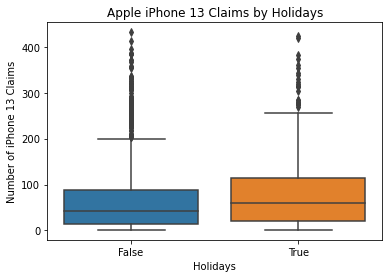

In [92]:
# Boxplot from seaborn
sns.boxplot(data=apple[apple["model_group"] == "iphone 13"], x="Holidays_Boolean", y="claim")


plt.xlabel("Holidays")  
plt.ylabel("Number of iPhone 13 Claims")

plt.title("Apple iPhone 13 Claims by Holidays")

# This is a boxplot on all individual iphone 13 claims data - the data is not yet aggregated

In [93]:
# Outliers for iPhone 13 Holiday False
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 13") & (apple["Holidays_Boolean"] == False)] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iPhone 13 Holiday True
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 13") & (apple["Holidays_Boolean"] == True)] ['claim'])
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]
display(outliers)

,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
203,apple iphone 13 pro max,128gb,blue,385,2022-11-14,November,2022,autumn,Q4,False,apple,iphone 13,4.133185
205,apple iphone 13 pro max,128gb,graphite,359,2022-11-14,November,2022,autumn,Q4,False,apple,iphone 13,3.794498
208,apple iphone 13 pro max,256gb,blue,385,2022-11-14,November,2022,autumn,Q4,False,apple,iphone 13,4.133185
518,apple iphone 13 pro max,128gb,blue,372,2022-11-28,November,2022,autumn,Q4,False,apple,iphone 13,3.963841
520,apple iphone 13 pro max,128gb,graphite,321,2022-11-28,November,2022,autumn,Q4,False,apple,iphone 13,3.299495
670,apple iphone 13 pro max,128gb,blue,319,2022-12-12,December,2022,autumn,Q4,False,apple,iphone 13,3.273442
672,apple iphone 13 pro max,128gb,graphite,368,2022-12-12,December,2022,autumn,Q4,False,apple,iphone 13,3.911736
675,apple iphone 13 pro max,256gb,blue,371,2022-12-12,December,2022,autumn,Q4,False,apple,iphone 13,3.950815
985,apple iphone 13 pro max,128gb,blue,311,2022-07-25,July,2022,summer,Q3,False,apple,iphone 13,3.169231
1140,apple iphone 13 pro max,128gb,blue,335,2022-08-01,August,2022,summer,Q3,False,apple,iphone 13,3.481865


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
358,apple iphone 13 pro max,128gb,blue,353,2022-11-21,November,2022,autumn,Q4,True,apple,iphone 13,3.079773
2710,apple iphone 13 pro max,256gb,blue,383,2022-11-07,November,2022,autumn,Q4,True,apple,iphone 13,3.423639
3295,apple iphone 13 pro max,128gb,blue,420,2023-01-02,January,2023,winter,Q1,True,apple,iphone 13,3.847740
3297,apple iphone 13 pro max,128gb,graphite,361,2023-01-02,January,2023,winter,Q1,True,apple,iphone 13,3.171471
3300,apple iphone 13 pro max,256gb,blue,374,2023-01-02,January,2023,winter,Q1,True,apple,iphone 13,3.320479
3613,apple iphone 13 pro max,128gb,blue,424,2023-01-16,January,2023,winter,Q1,True,apple,iphone 13,3.893588


#### EDA on iPhone 13 by Aggregating Claims Data for Each Weeks_Monday Sub-Section - Holidays

In [94]:
iphone_13 = apple[apple["model_group"] == "iphone 13"]

result_iphone_13 = iphone_13.groupby(['Holidays_Boolean', 'weeks_monday'], as_index = False).agg({'claim': np.sum})

print(result_iphone_13)

    Holidays_Boolean weeks_monday  claim
0              False   2021-11-15      2
1              False   2021-11-29      6
2              False   2021-12-06      2
3              False   2021-12-13     10
4              False   2022-01-03      7
..               ...          ...    ...
61              True   2022-11-07   3426
62              True   2022-11-21   3084
63              True   2022-12-26   2616
64              True   2023-01-02   3683
65              True   2023-01-16   3828

[66 rows x 3 columns]


Text(0.5, 1.0, 'Apple iPhone 13 Claims by Holidays')

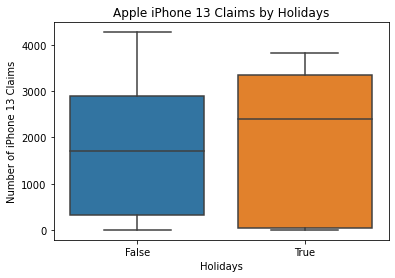

In [95]:
# Boxplot from seaborn
sns.boxplot(data=result_iphone_13, x = "Holidays_Boolean", y="claim")

plt.xlabel("Holidays")
plt.ylabel("Number of iPhone 13 Claims") 

plt.title("Apple iPhone 13 Claims by Holidays")

# This is a more proper graphic - representing all iphone 13 Claims data through weeks_monday aggregation

In [96]:
iphone13_stats = result_iphone_13.groupby(['Holidays_Boolean']).agg({'claim': ['mean', 'min', 'max']})
print(iphone13_stats)

                        claim          
                         mean min   max
Holidays_Boolean                       
False             1751.269231   2  4270
True              1903.000000   3  3828


### EDA on iPhone 14 - Holidays

Text(0.5, 1.0, 'Apple iPhone 14 Claims by Holidays')

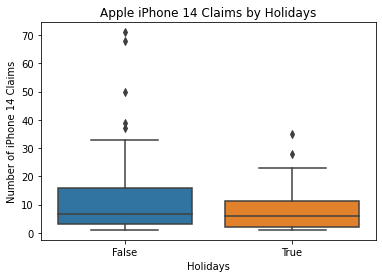

In [97]:
# Boxplot from seaborn
sns.boxplot(data=apple[apple["model_group"] == "iphone 14"], x="Holidays_Boolean", y="claim")


plt.xlabel("Holidays")  
plt.ylabel("Number of iPhone 14 Claims")

plt.title("Apple iPhone 14 Claims by Holidays")

# This is a boxplot on all individual iphone 14 claims data - the data is not yet aggregated

In [98]:
# Outliers for iPhone 14 Holiday False
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 14") & (apple["Holidays_Boolean"] == False)] ['claim'])
outliers = data[(data['z_score'] > 1.25) | (data['z_score'] < -3)]
display(outliers)

# Outliers for iPhone 14 Holiday True
data['z_score'] = stats.zscore(apple[(apple["model_group"] == "iphone 14") & (apple["Holidays_Boolean"] == True)] ['claim'])
outliers = data[(data['z_score'] > 2) | (data['z_score'] < -3)]
display(outliers)

,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
3470,apple iphone 14,128gb,black,37,2023-01-09,January,2023,winter,Q1,False,apple,iphone 14,1.469786
10214,apple iphone 14,128gb,black,39,2023-01-23,January,2023,winter,Q1,False,apple,iphone 14,1.592695
10541,apple iphone 14 pro max,128gb,black,71,2023-02-06,February,2023,winter,Q1,False,apple,iphone 14,3.559239
10542,apple iphone 14 pro max,128gb,gold,50,2023-02-06,February,2023,winter,Q1,False,apple,iphone 14,2.268695
10543,apple iphone 14 pro max,128gb,purple,68,2023-02-06,February,2023,winter,Q1,False,apple,iphone 14,3.374875


,phone model,phone size,phone color,claim,weeks_monday,month,year,season,quarter,Holidays_Boolean,company,model_group,z_score
3306,apple iphone 14,128gb,black,28,2023-01-02,January,2023,winter,Q1,True,apple,iphone 14,2.052455
3625,apple iphone 14,128gb,black,35,2023-01-16,January,2023,winter,Q1,True,apple,iphone 14,2.806638


#### EDA on iPhone 14 by Aggregating Claims Data for Each Weeks_Monday Sub-Section - Holidays

In [99]:
iphone_14 = apple[apple["model_group"] == "iphone 14"]

result_iphone_14 = iphone_14.groupby(['Holidays_Boolean', 'weeks_monday'], as_index = False).agg({'claim': np.sum})

print(result_iphone_14)

    Holidays_Boolean weeks_monday  claim
0              False   2022-11-14      9
1              False   2022-11-28     23
2              False   2022-12-05     43
3              False   2022-12-12     32
4              False   2022-12-19     36
5              False   2023-01-09     59
6              False   2023-01-23     57
7              False   2023-01-30     54
8              False   2023-02-06    251
9              False   2023-02-13     64
10              True   2022-11-21     30
11              True   2022-12-26     44
12              True   2023-01-02     45
13              True   2023-01-16     60


Text(0.5, 1.0, 'Apple iPhone 14 Claims by Holidays')

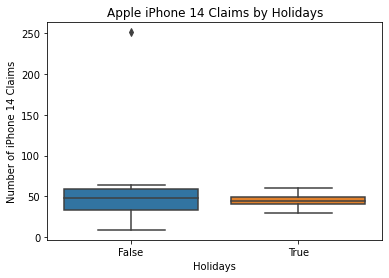

In [100]:
# Boxplot from seaborn
sns.boxplot(data=result_iphone_14, x = "Holidays_Boolean", y="claim")

plt.xlabel("Holidays")
plt.ylabel("Number of iPhone 14 Claims") 

plt.title("Apple iPhone 14 Claims by Holidays")

# This is a more proper graphic - representing all iphone 14 Claims data through weeks_monday aggregation

In [101]:
result_iphone_14_holidays_false = result_iphone_14.copy()

holidays_false_iphone_14 = result_iphone_14_holidays_false[result_iphone_14_holidays_false["Holidays_Boolean"] == False]

display(holidays_false_iphone_14)

holidays_false_iphone_14['z_score'] = stats.zscore(holidays_false_iphone_14['claim'])
outliers_holidays_false_iphone_14 = holidays_false_iphone_14[(holidays_false_iphone_14['z_score'] > 2.5) | (holidays_false_iphone_14['z_score'] < -3)]
display(outliers_holidays_false_iphone_14)

# Note: Outliers for boxplots are when they are outside of the 1.5 * IQR range, this doesn't necessarily match up to the z-score
# definition, so the z-score value cut-offs have been slightly adjusted so we can identify the data point that fell out of range
# for the boxplots

,Holidays_Boolean,weeks_monday,claim
0,False,2022-11-14,9
1,False,2022-11-28,23
2,False,2022-12-05,43
3,False,2022-12-12,32
4,False,2022-12-19,36
5,False,2023-01-09,59
6,False,2023-01-23,57
7,False,2023-01-30,54
8,False,2023-02-06,251
9,False,2023-02-13,64


/tmp/ipykernel_19630/1059616815.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holidays_false_iphone_14['z_score'] = stats.zscore(holidays_false_iphone_14['claim'])


,Holidays_Boolean,weeks_monday,claim,z_score
8,False,2023-02-06,251,2.901103


In [102]:
iphone14_stats = result_iphone_14.groupby(['Holidays_Boolean']).agg({'claim': ['mean', 'min', 'max']})
print(iphone14_stats)

                  claim         
                   mean min  max
Holidays_Boolean                
False             62.80   9  251
True              44.75  30   60
